# 1. Definição do Problema

#### Indicadores de Doença Cardíaca

De acordo com o CDC (Centers for Disease Control and Prevention), a doença cardíaca é uma das principais causas de morte para pessoas da maioria das raças nos EUA. Quase metade de todos os americanos (47%) têm pelo menos 1 dos 3 principais fatores de risco para doenças cardíacas: pressão alta, colesterol alto e tabagismo. Outros indicadores-chave incluem diabetes, obesidade (IMC alto), não praticar atividade física suficiente ou beber muito álcool. Detectar e prevenir os fatores que têm maior impacto nas doenças cardíacas é muito importante na área da saúde. Dessa forma, detectar “padrões” a partir dos dados pode nos auxiliar no melhor acompanhamento da condição do paciente.

# 2. Extração dos Dados

#### Importação de Bibliotecas

In [1]:
# Importando Numpy - Biblioteca utilizada para realizar operações envolvendo álgebra linear
import numpy as np 

# Importando Pandas - Biblioteca utilizada para realizar extração e manipulação de dados
import pandas as pd

# Importando Matplotlib e Seaborn - Bibliotecas utilizadas para realizar a Visualização dos Dados
import matplotlib.pyplot as plt
import seaborn as sns

#### Extração dos Dados

In [2]:
# Extração dos Dados
df = pd.read_csv('../input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv')

# Exibição das 5 Primeiras Linhas do DataFrame
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Descrição de cada Coluna
- `HeartDisease`: Pessoas que informaram ter doença arterial coronariana ou sofreram infarto do miocárdio;
- `BMI`: Índice de Massa Corporal (IMC);
- `Smoking`: Você fumou pelo menos 100 cigarros durante a sua vida?
- `AlcoholDrinking`: Você bebeu 14 bebidas por semana (se for homem) ou 7 bebidas por semana (se for mulher)?
- `Stroke`: Você já teve AVC?
- `PhysicalHealth`: Por quantos dias durante os últimos 30 dias sua saúde física não esteve boa?
- `MentalHealth`: Por quantos dias durante os últimos 30 dias sua saúde mental não esteve boa?
- `DiffWalking`: Você tem sérias dificuldades para fazer caminhada ou subir escadas?
- `Sex`: Você é homem ou mulher?
- `AgeCategory`: Faixa etária;
- `Race`: Raça;
- `Diabetic`: Você tem diabetes?
- `PhysicalActivity`: Adultos que reportaram realizar atividade física durante os últimos 30 dias?
- `GenHealth`: Como você considera a sua condição geral de saúde?
- `SleepTime`: Em média, quantas horas você dorme por dia?
- `Asthma`: Você tem asma?
- `KidneyDisease`: Você teve alguma doença renal (Não incluindo pedra nos rins, infecção na bexiga ou incontinência)?
- `SkinCancer`: Você já teve câncer de pele?

# 3. Preparação dos Dados

In [3]:
# Nomes das colunas
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [4]:
# Dimensão do Dataset
print('Número de Linhas = ',df.shape[0])
print('Número de Colunas = ',df.shape[1])

Número de Linhas =  319795
Número de Colunas =  18


In [5]:
# Tipo de Cada Coluna
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [6]:
# Verificando os valores únicos por coluna
[print(coluna+' possui '+str(df[coluna].nunique())+' valores únicos') for coluna in df.columns];

HeartDisease possui 2 valores únicos
BMI possui 3604 valores únicos
Smoking possui 2 valores únicos
AlcoholDrinking possui 2 valores únicos
Stroke possui 2 valores únicos
PhysicalHealth possui 31 valores únicos
MentalHealth possui 31 valores únicos
DiffWalking possui 2 valores únicos
Sex possui 2 valores únicos
AgeCategory possui 13 valores únicos
Race possui 6 valores únicos
Diabetic possui 4 valores únicos
PhysicalActivity possui 2 valores únicos
GenHealth possui 5 valores únicos
SleepTime possui 24 valores únicos
Asthma possui 2 valores únicos
KidneyDisease possui 2 valores únicos
SkinCancer possui 2 valores únicos


In [7]:
# Verificando a existência de possíveis linhas duplicadas
df.duplicated().sum()

18078

In [8]:
# Remoção das linhas duplicadas
df.drop_duplicates(inplace=True)

In [9]:
# Verificando a existência de possíveis valores ausentes
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

Notamos que não há valores ausentes

# 4. Exploração / Visualização dos Dados

#### Estatística Descritiva

In [10]:
# Estatística Descritiva

# O comando describe retorna parâmetros estatísticos tais como: contagem de linhas, média, desvio 
# padrão, mínimo, máximo, primeiro, segundo e terceiro quartis.
# Deve-se lembrar que este comando só se aplica às variáveis numéricas.

df_describe = df.describe().T
df_describe

,count,mean,std,min,25%,50%,75%,max
BMI,301717.0,28.441970,6.468134,12.02,24.03,27.41,31.65,94.85
PhysicalHealth,301717.0,3.572298,8.140656,0.00,0.00,0.00,2.00,30.00
MentalHealth,301717.0,4.121475,8.128288,0.00,0.00,0.00,4.00,30.00
SleepTime,301717.0,7.084559,1.467122,1.00,6.00,7.00,8.00,24.00


Embora bastante útil, o comando describe não expressa alguns parâmetros estatísticos relevantes para a análise de dados, tais como: skewness, kurtosis, mediana e intervalo.

df.skew() retorna um valor que nos indica como está a distribuição dos dados para aquela váriavel ou seja, se os dados estão simétricos ou assimétricos, caso estejam assimétricos podemos saber se está para esquerda ou para a direita. Se a assimetria (skew) estiver entre -0,5 e 0,5, os dados são bastante simétricos; Se a assimetria (skew) estiver entre -1 e -0,5 ou entre 0,5 e 1, os dados serão moderadamente distorcidos; Se a assimetria (skew) for menor que -1 ou maior que 1, os dados são altamente distorcidos;

Kurtosis é uma medida que caracteriza o achatamento da curva da função de distribuição de probabilidade, de tal forma que para uma distribuição normal, o valor de Kurtosis é 3. Frequentemente utiliza-se como parâmetro o excesso de kurtosis, obtido apenas realizando a subtração do valor de kurtosis por 3.

Se o excesso de kurtosis for igual a 0 significa dizer que se trata de uma distribuição normal;

Se o excesso de kurtosis for maior do que 0 significa dizer que a distribuição é mais concentrada do que a distribuição normal;

Se o excesso de kurtosis for menor do que 0 significa dizer que a distribuição é menos concentrada do que a distribuição normal;

O comando df.kurtosis() retorna o excesso de kurtosis;

A mediana separa a amostra em duas partes de modo que ela se encontra no centro da amostra. Para obtê-la deve-se ordenar a amostra em ordem crescente ou decrescente e buscar pelo valor que se localiza no centro da amostra.

O comando df.median() retorna a mediana de cada variável pertencente ao DataFrame df.

O intervalo representa a distância entre os dois extremos em uma amostra, ou seja, valor máximo subtraído pelo valor mínimo.

In [11]:
# Definindo as variáveis numéricas e categóricas
num_attributes = df.select_dtypes(include=['int64', 'float64'])
cat_attributes = df.select_dtypes(exclude=['int64', 'float64'])

In [12]:
df_skewness  = pd.DataFrame(num_attributes.skew(),columns=['skew'])
df_kurtosis  = pd.DataFrame(num_attributes.kurtosis(),columns=['kurtosis'])
df_median    = pd.DataFrame(num_attributes.median(),columns=['median'])
df_intervalo = pd.DataFrame(num_attributes.max() - num_attributes.min(),columns=['range'])

In [13]:
df_descritive_statistics = pd.concat([df_describe,df_skewness,df_kurtosis,df_median,df_intervalo],\
                                     axis=1)
df_descritive_statistics

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis,median,range
BMI,301717.0,28.441970,6.468134,12.02,24.03,27.41,31.65,94.85,1.297737,3.690674,27.41,82.83
PhysicalHealth,301717.0,3.572298,8.140656,0.00,0.00,0.00,2.00,30.00,2.501000,4.971244,0.00,30.00
MentalHealth,301717.0,4.121475,8.128288,0.00,0.00,0.00,4.00,30.00,2.237470,3.938538,0.00,30.00
SleepTime,301717.0,7.084559,1.467122,1.00,6.00,7.00,8.00,24.00,0.697224,7.572206,7.00,23.00


Notamos que as distribuições das variáveis BMI, PhysicalHealth e MentalHealth são altamente assimétricas, enquanto a variável SleepTime é levemente assimétrica

### Análise Univariada

In [14]:
# Create the function to visualize to pie chart
def draw_pie_chart(list_name_feature):
    indice = 0
    for name_feature in list_name_feature:
        fig,axes = plt.subplots(figsize=(8,8))
        textprops = {"fontsize":15}
        axes.pie(df[name_feature].value_counts(),autopct='%1.2f%%',
                    textprops=textprops)
        axes.set_title(name_feature,fontsize=15)
        axes.legend(df[name_feature].value_counts().index,fontsize=12,bbox_to_anchor=(0.9,0,0.01,1))
        
        indice += 1
        
    plt.show() 
    
    return

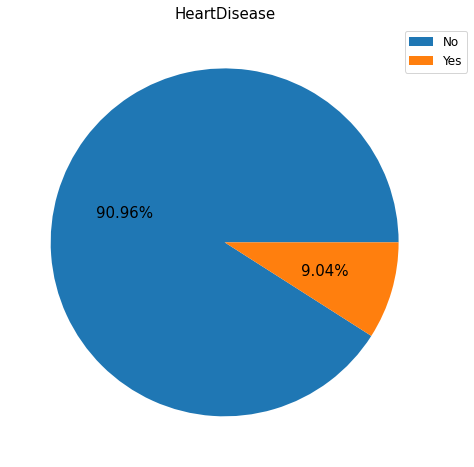

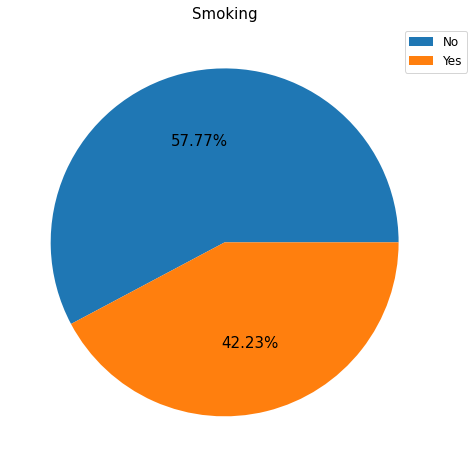

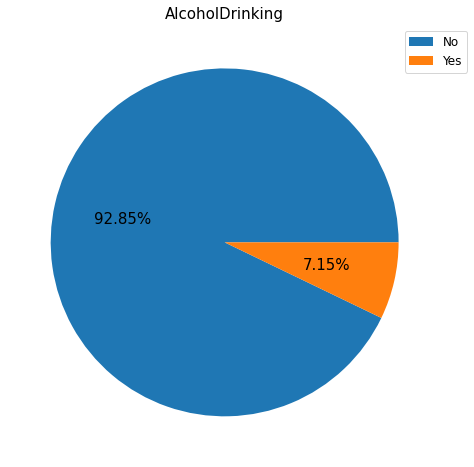

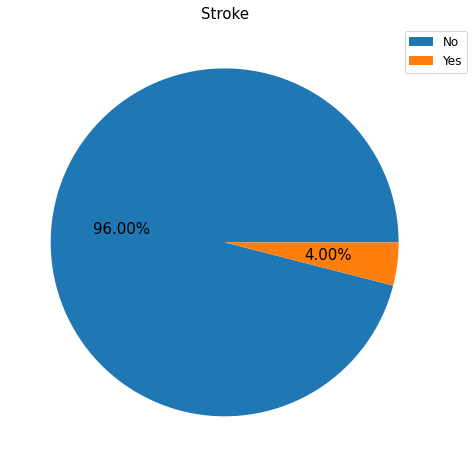

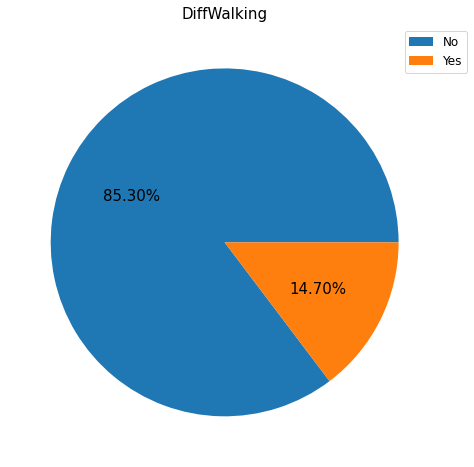

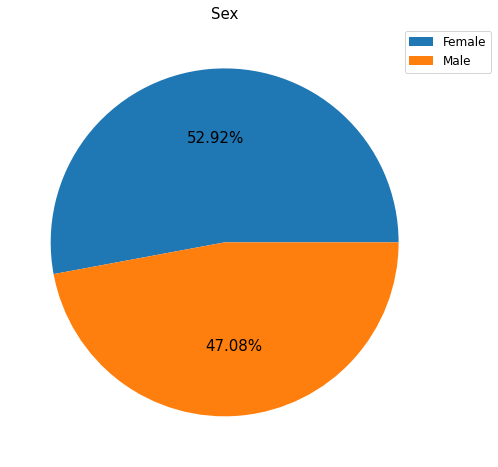

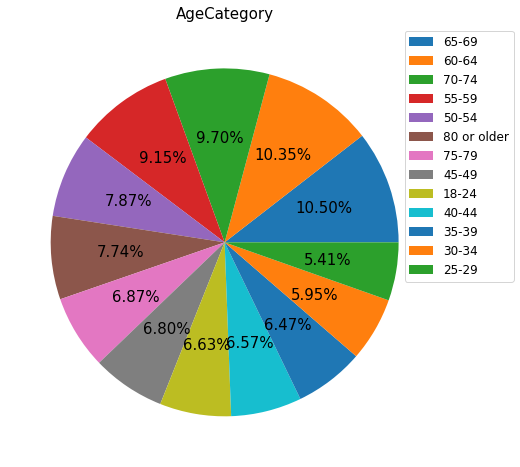

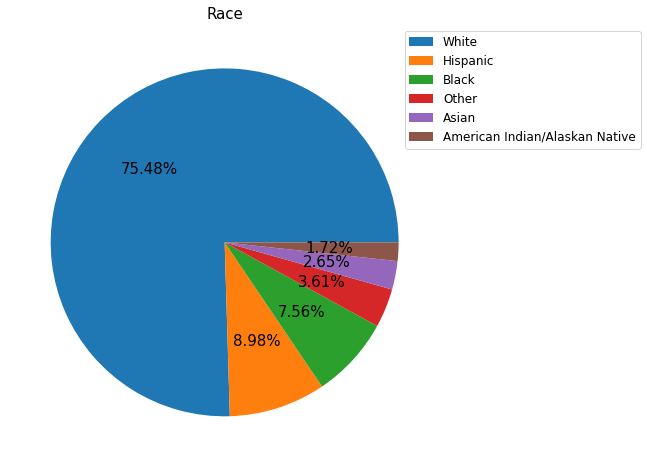

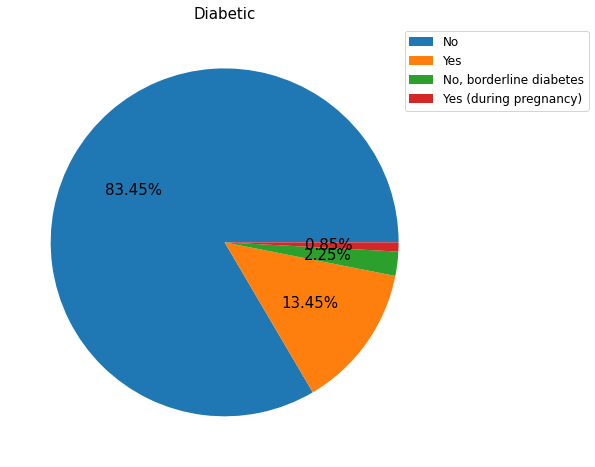

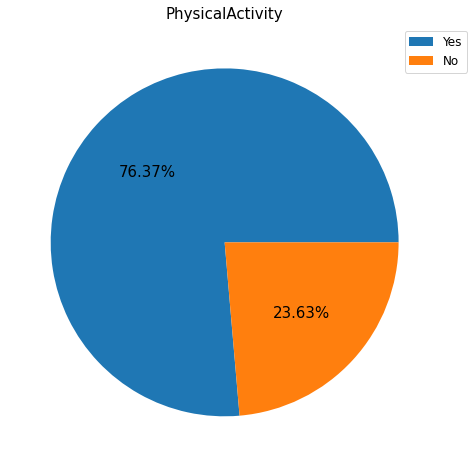

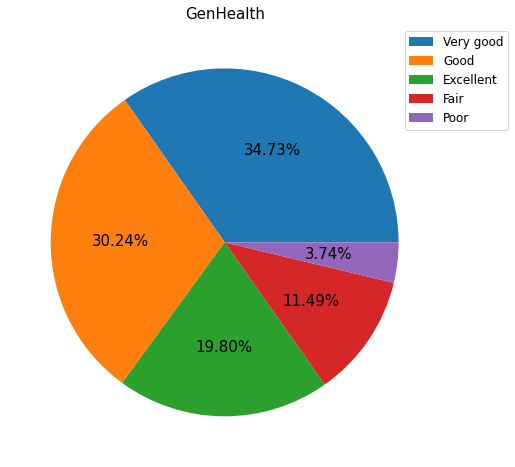

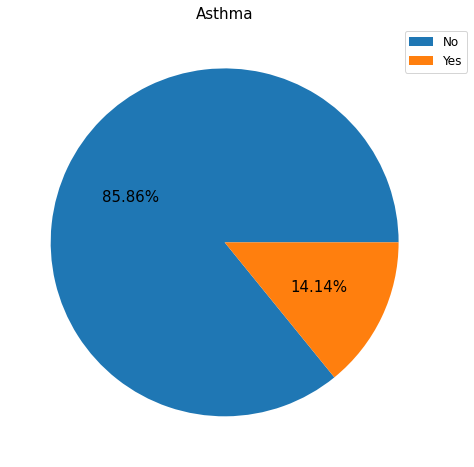

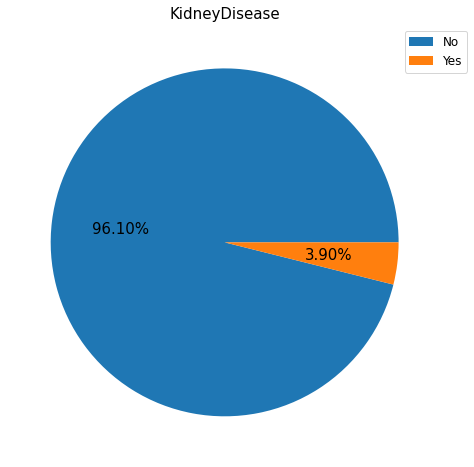

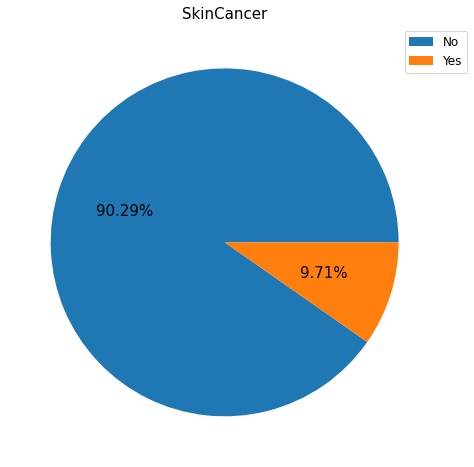

In [15]:
draw_pie_chart(cat_attributes.columns)

**Insights**: 

* Notamos que 9,04% das pessoas avaliadas neste dataset possuem doenças cardíacas;
* Notamos que 42,23% das pessoas avaliadas neste dataset são fumantes;
* Notamos que a grande maioria (92,85%) das pessoas avaliadas neste dataset não ingeriram quantidade de bebidas alcóolicas superior ao limite estipulado no momento de construção do conjunto de dados;
* Notamos que 4% das pessoas avaliadas neste dataset tiveram AVC;
* Notamos que a grande maioria (85,30%) das pessoas avaliadas neste dataset não tiveram dificuldades para andar ou para subir escadas;
* Notamos que a grande maioria (52,92%) das pessoas avaliadas neste dataset são do gênero feminino;
* Notamos que as faixas etárias de 65 e 69 anos e de 60 a 64 anos compreendem a maiores quantidades de pessoas dentre as avaliadas neste dataset correspondendo, nesta ordem, a 10,50% e 10,35%, enquanto a faixa etária com menor número de pessoas (5,41%) foi de 25 a 29 anos;
* Notamos que a grande maioria (75,48%) das pessoas avaliadas neste dataset são brancas, enquanto apenas 1,72% das pessoas são pessoas que têm origem em qualquer um dos povos originários da América do Norte e do Sul (incluindo a América Central) e que mantém afiliação tribal ou ligação com a comunidade;
* Notamos que a grande maioria (83,45%) das pessoas avaliadas neste dataset não são diabéticas ao passo que 0,85% desenvolveram diabetes durante a gravidez;
* Notamos que a grande maioria (76,37%) das pessoas avaliadas neste dataset praticaram atividade física nos últimos 30 dias;
* Notamos que 34,73% das pessoas avaliadas neste dataset consideram a sua condição geral de saúde como sendo muito boa, enquanto 3,74% julgam a sua condição geral como ruim;
* Notamos que 14,14% das pessoas avaliadas neste dataset são asmáticas;
* Notamos que 3,90% das pessoas avaliadas neste dataset possuem doença renal;
* Notamos que 9,71% das pessoas avaliadas neste dataset possuem câncer de pele;

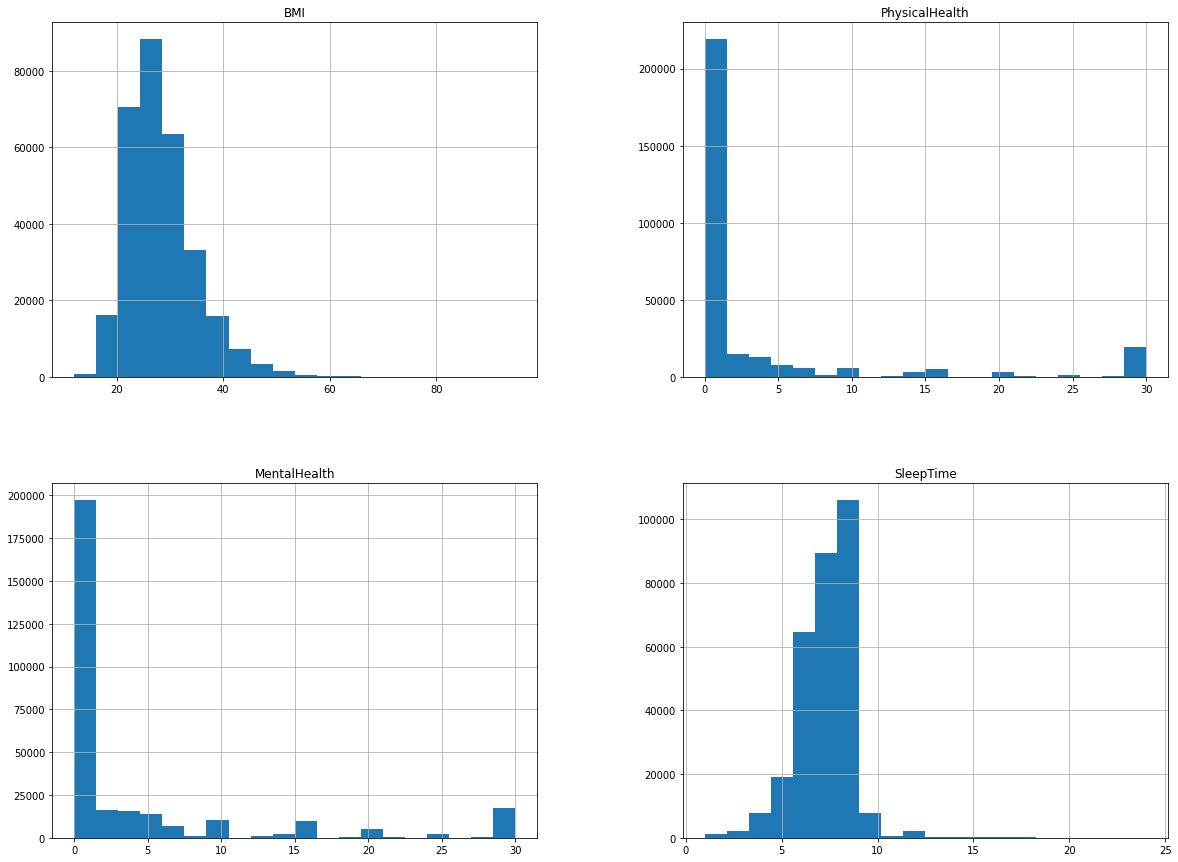

In [16]:
# Plotagem de histogramas 
# Histogramas expressam a distribuição de frequência para variáveis numéricas

_ = df.hist(bins=20,figsize=(20,15))

In [17]:
# Função que auxilia na plotagem dos gráficos KDE
def plot_kde(df):
    fig, ax = plt.subplots(int(len(num_attributes.columns)/2),
                           int(len(num_attributes.columns)/2), 
                           figsize=(12,10),sharey=True)
    colunas = num_attributes.columns
    indice = 0
    for j in range(len(ax)):
        for i in range(len(ax[j])):
            ax[j][i].tick_params(labelsize=10)
            ax[j][i] = sns.kdeplot(data=df[colunas[indice]], ax=ax[j][i],shade=True)
            indice += 1
    fig.suptitle('KDE Plots', position=(.5,1), fontsize=20)
    fig.tight_layout()
    return

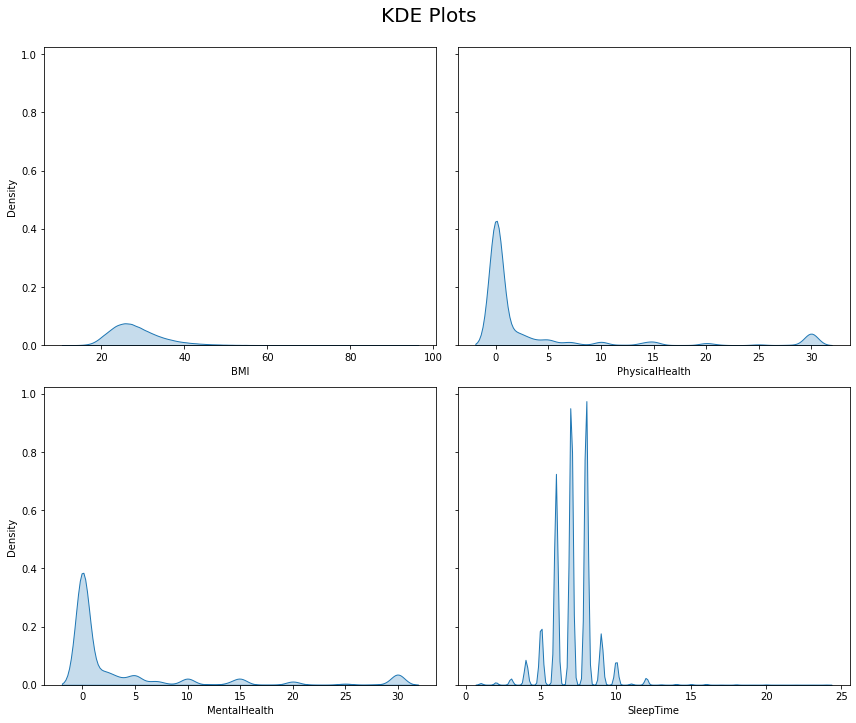

In [18]:
# KDE plot 
plot_kde(df)

**A partir da análise dos histogramas e KDE plots podemos observar que:**
* A grande maioria das pessoas avaliadas neste dataset possuem BMI entre 20 e 40;
* A grande maioria das pessoas contidas no dataset praticaram atividade física em menos de 5 dias dentre os últimos 30 dias;
* A grande maioria das pessoas contidas no dataset consideraram a saúde mental como boa durante mais de 25 dias;
* A grande maioria das pessoas avaliadas neste dataset dormem entre 5 e 10 horas por dia;

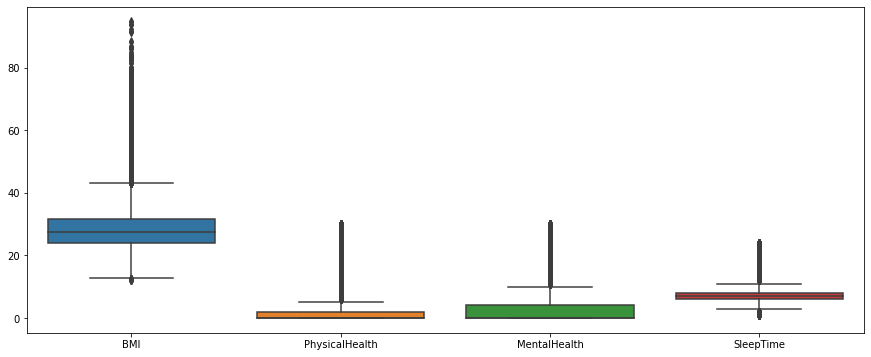

In [19]:
# Visualização da distribuição através de Boxplot
plt.figure(figsize=(15,6))
sns.boxplot(data=df);

No boxplot, podemos visualizar o primeiro, segundo (mediana) e terceiro quartil, além dos limites (inferior e superior). O boxplot nos auxilia a identificar a presença de outliers, sendo estes os valores acima do limite superior e abaixo do limite inferior, além disso, podemos extrair informações a respeito da distribuição de cada uma dessas variáveis. Notamos que as variáveis: PhysicalHealth e SleepTime apresentam uma grande concentração na distribuição, enquanto a variável BMI apresenta o maior grau de espalhamento em relação à distribuição

### Análise Bivariada

O comando .pairplot gera distribuições univariadas na diagonal e distribuições bivariadas fora das diagonais

A importância desse tipo de gráfico é observar o comportamento das variáveis através de histogramas na diagonal e scatterplots fora da diagonal. Esses scatterplots representam a relação entre os pares de features.

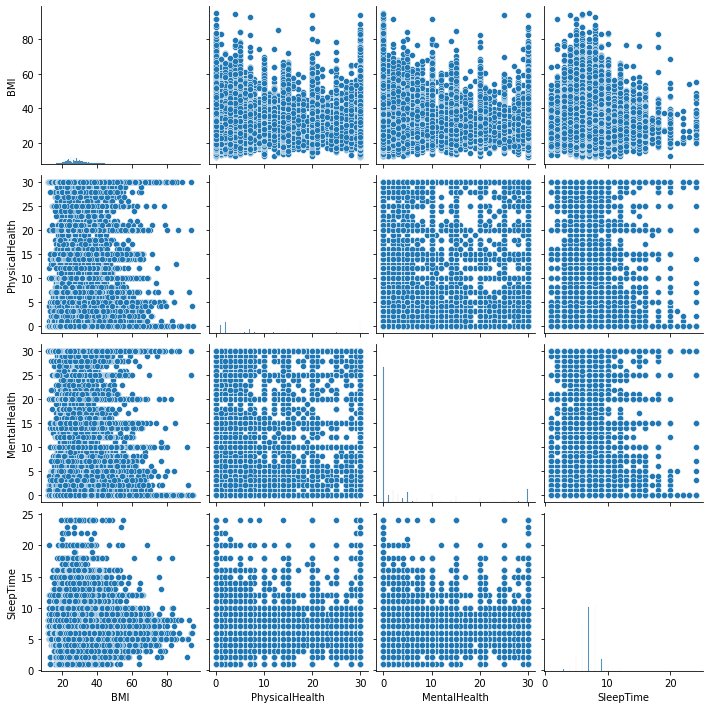

In [20]:
sns.pairplot(df)
plt.show()

In [21]:
# Aplicando coeficiente de correlação de Pearson
df.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.103813,0.056724,-0.048653
PhysicalHealth,0.103813,1.000000,0.279657,-0.058406
MentalHealth,0.056724,0.279657,1.000000,-0.117078
SleepTime,-0.048653,-0.058406,-0.117078,1.000000


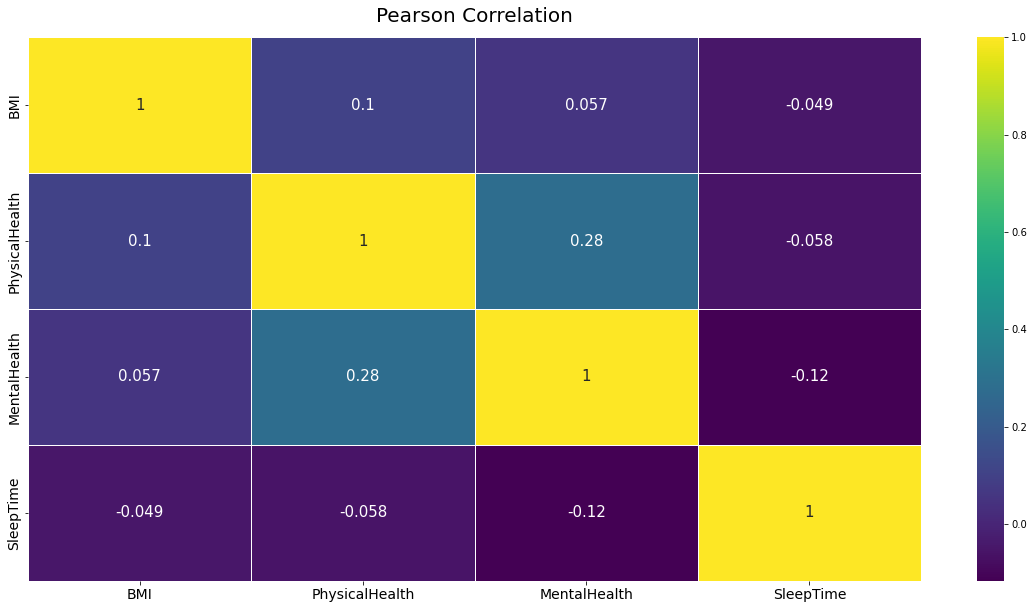

In [22]:
# Visualizar a correlação entre cada variável utilizando a correlação de Pearson 
_ = plt.figure(figsize = (20,10))
res = sns.heatmap(df.corr(), vmax = 1, linewidths = 0.9, cmap = 'viridis',annot_kws={"size": 15},annot=True)
_ = plt.title('Pearson Correlation', fontsize = 20, pad = 15)
_ = res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
_ = res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)

A relação linear mais forte entre duas variáveis ocorre entre "MentalHealth" e "PhysicalHealth" uma vez que o coeficiente de correlação de Pearson é 0.29, entretanto, essa relação linear não é tão forte

In [23]:
# Create the function to visualize to bar chart
def plot_bar(name_feature):

    labels = df[name_feature].unique()
    textprops = {"fontsize":15}
    
    if len(labels) > 5:
        fig,axes = plt.subplots(1,2,figsize=(20,8),sharex=True)
        plt.title(name_feature)
        axes[0].barh(y=df[df.HeartDisease=="No"][name_feature].value_counts().index,
                    width=df[df.HeartDisease=="No"][name_feature].value_counts(),color=['#001f65','#e9791a'])
        axes[0].set_title(name_feature+' - '+'Não doente cardíaco',fontsize=15)
        axes[1].barh(y=df[df.HeartDisease=="No"][name_feature].value_counts().index,
                    width=df[df.HeartDisease=="Yes"][name_feature].value_counts(),color=['#001f65','#e9791a'])
        axes[1].set_title(name_feature+' - '+'Doente cardíaco',fontsize=15)
    else:    
        fig,axes = plt.subplots(1,2,figsize=(20,8),sharey=True)
        plt.title(name_feature)
        axes[0].bar(x=df[df.HeartDisease=="No"][name_feature].value_counts().index,
                    height=df[df.HeartDisease=="No"][name_feature].value_counts(),color=['#001f65','#e9791a'])
        axes[0].set_title(name_feature+' - '+'Não doente cardíaco',fontsize=15)
        axes[1].bar(x=df[df.HeartDisease=="No"][name_feature].value_counts().index,
                    height=df[df.HeartDisease=="Yes"][name_feature].value_counts(),color=['#001f65','#e9791a'])
        axes[1].set_title(name_feature+' - '+'Doente cardíaco',fontsize=15)
    plt.show() 

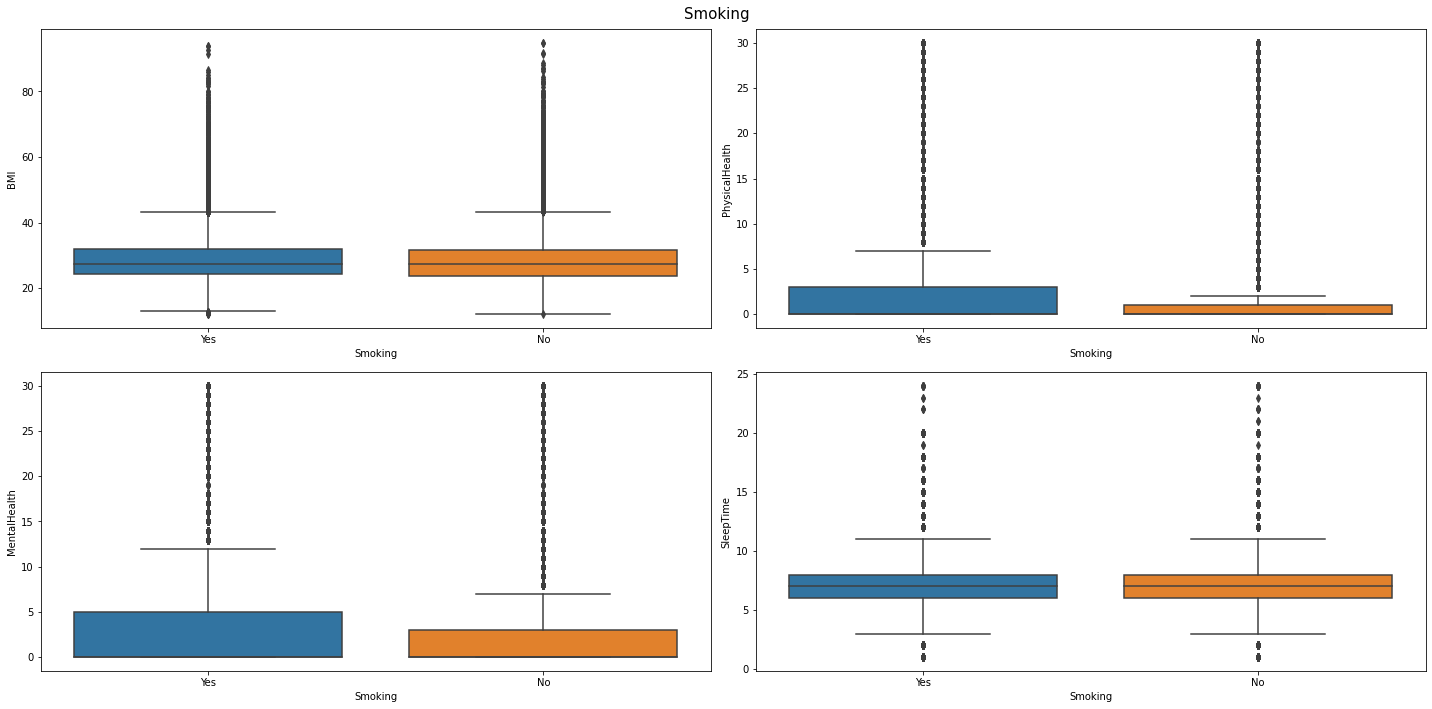

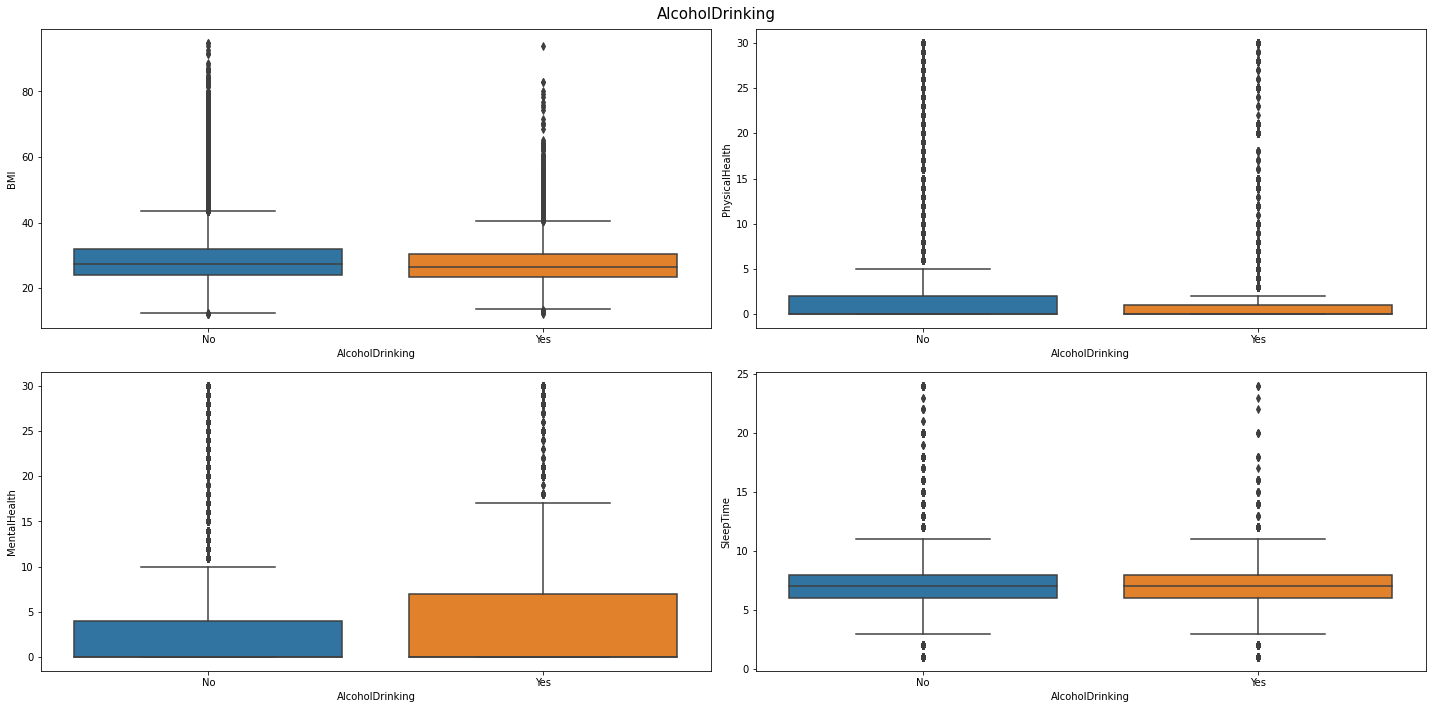

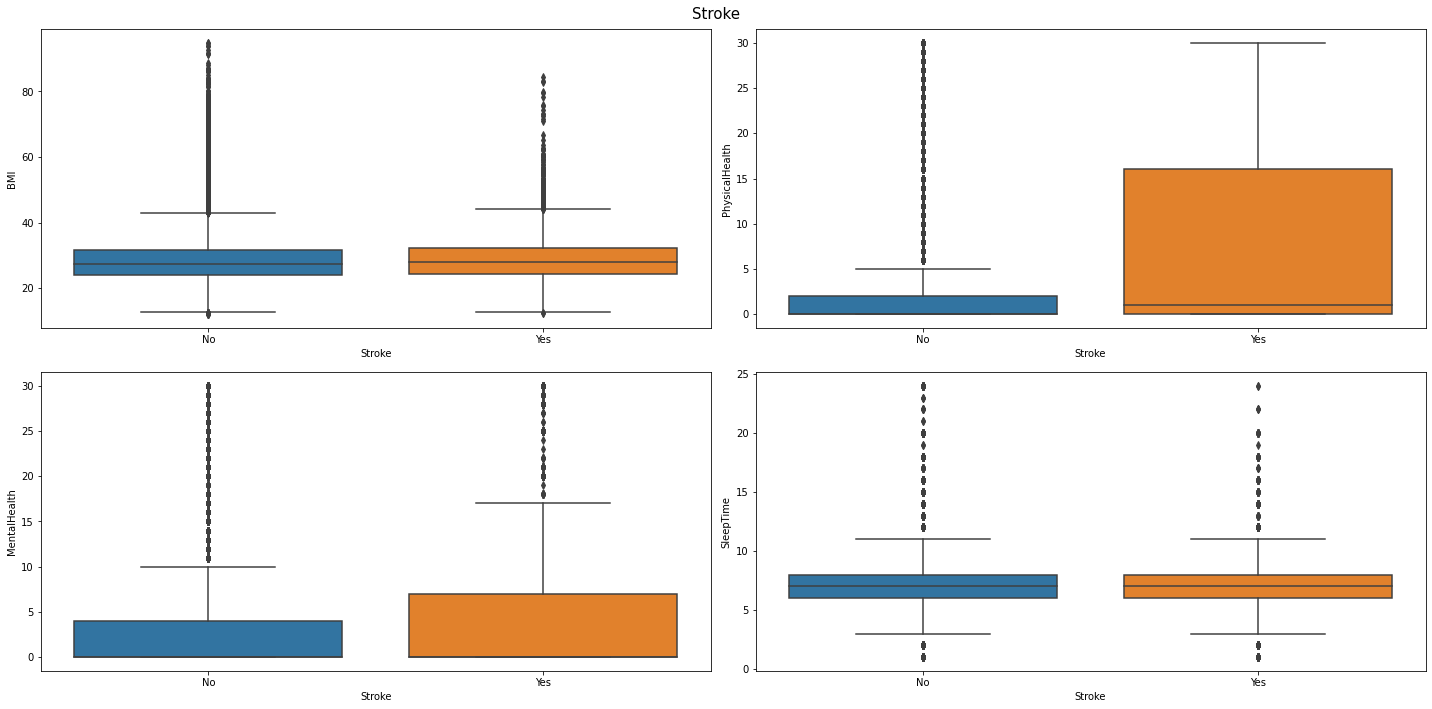

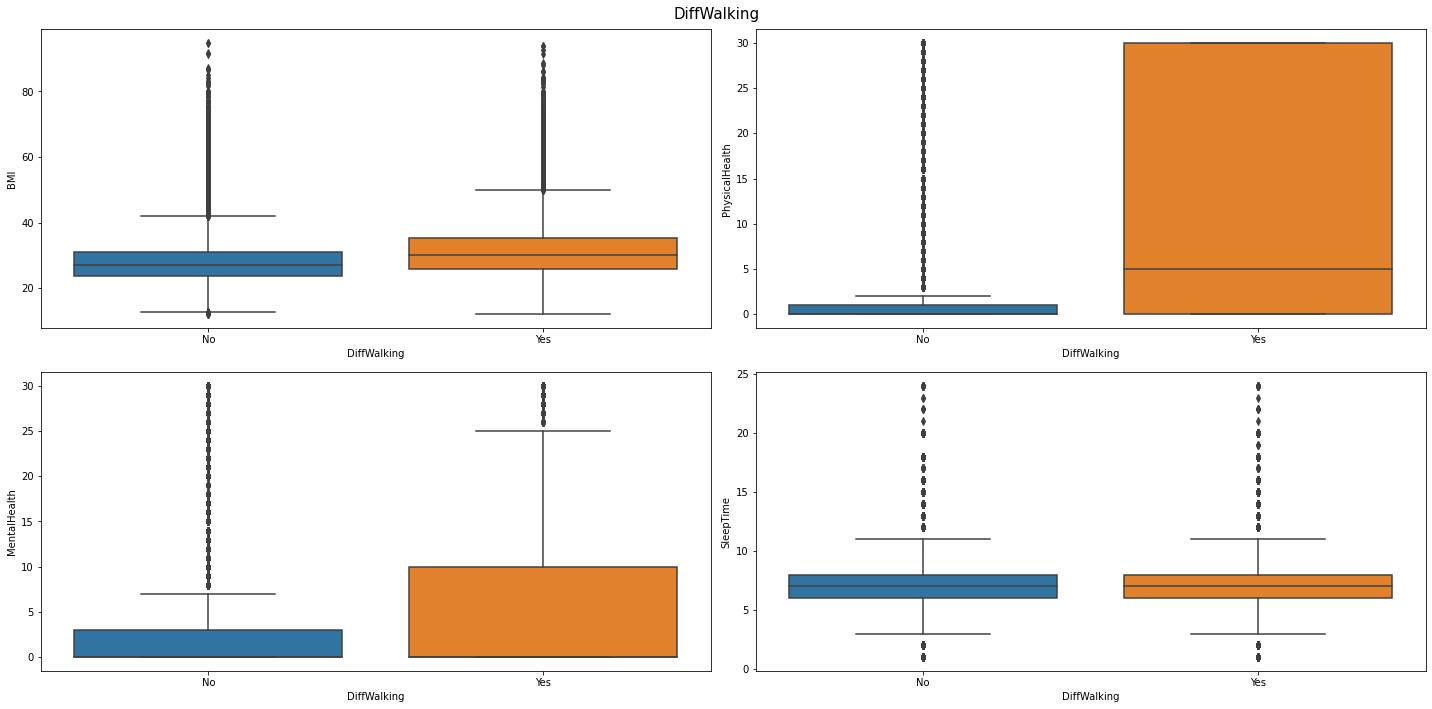

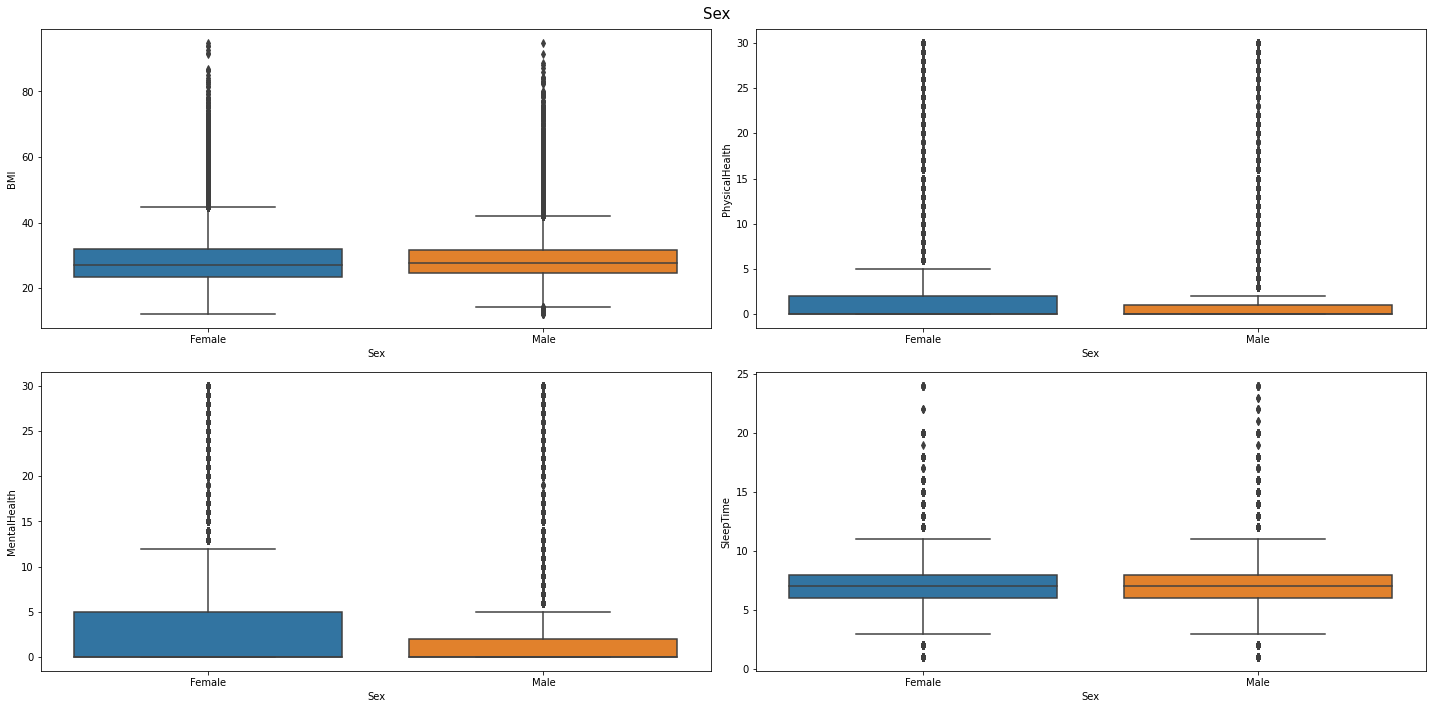

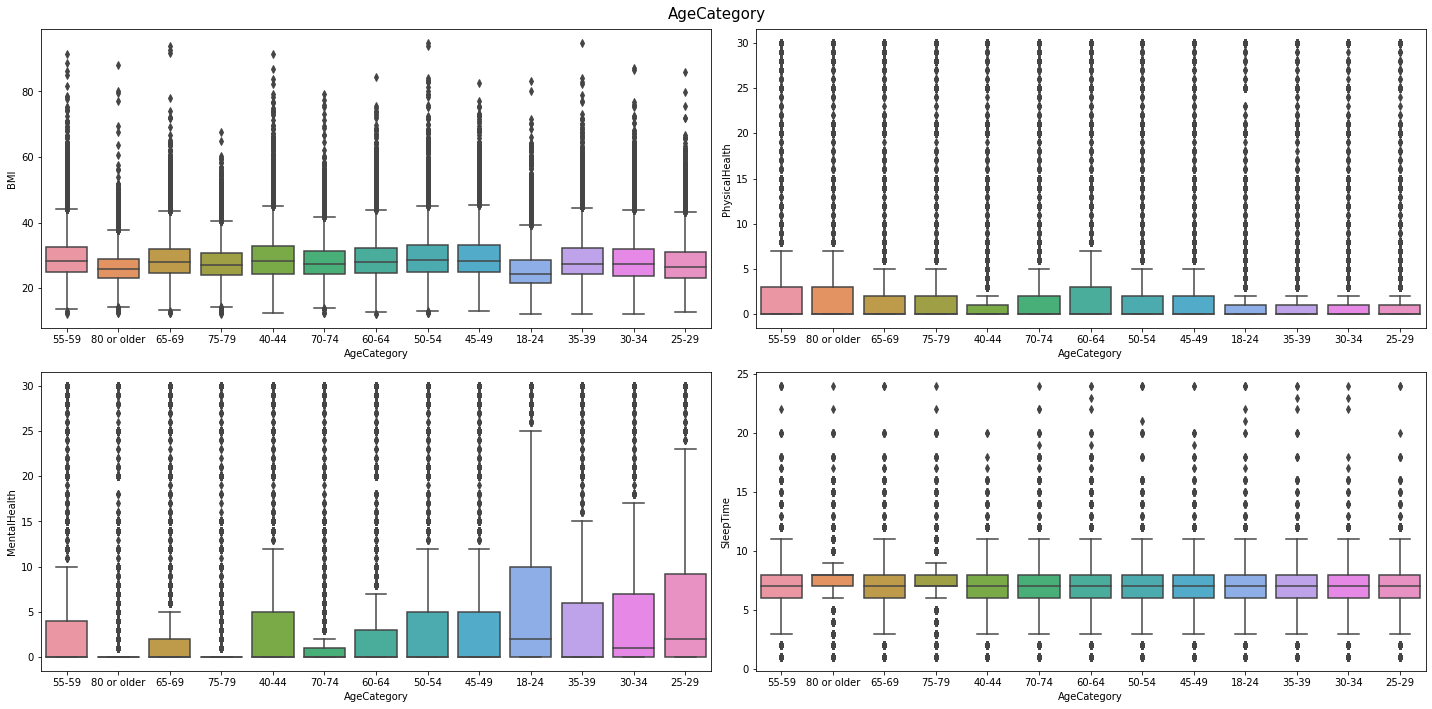

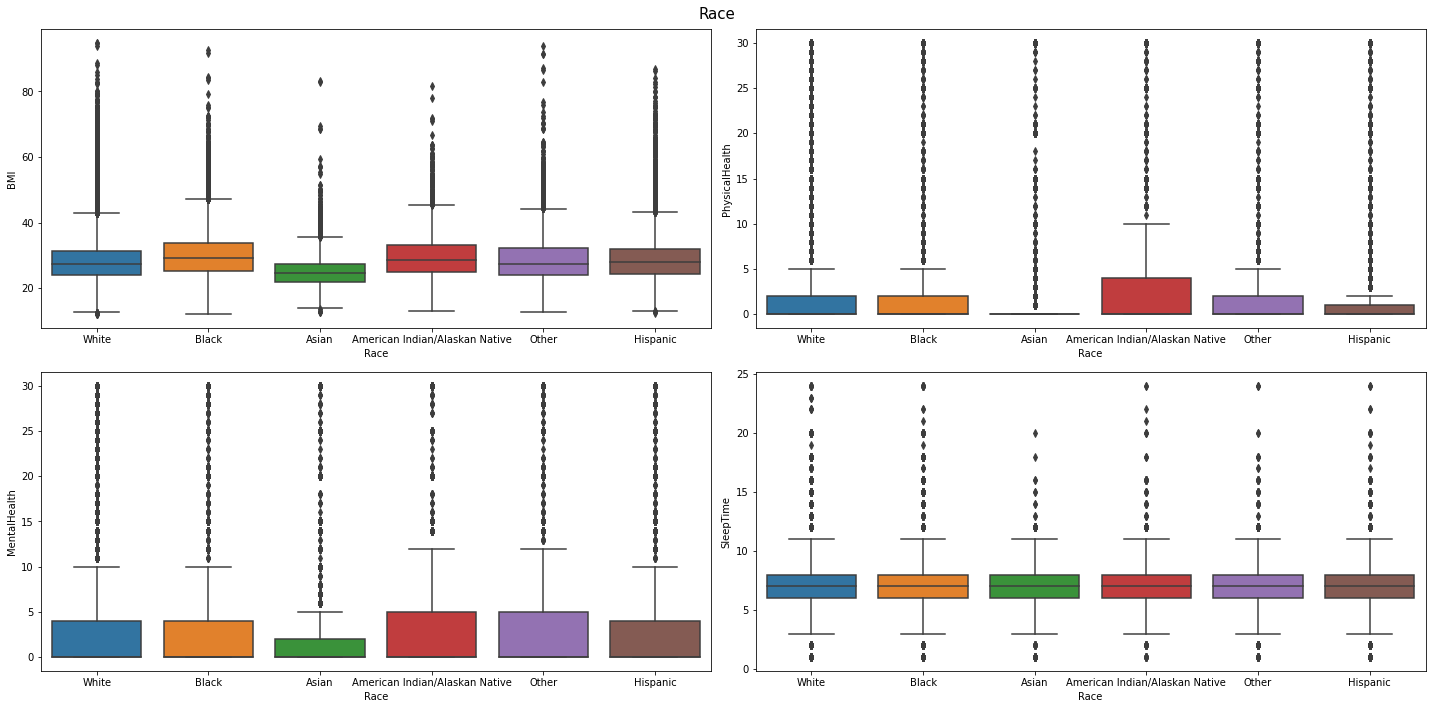

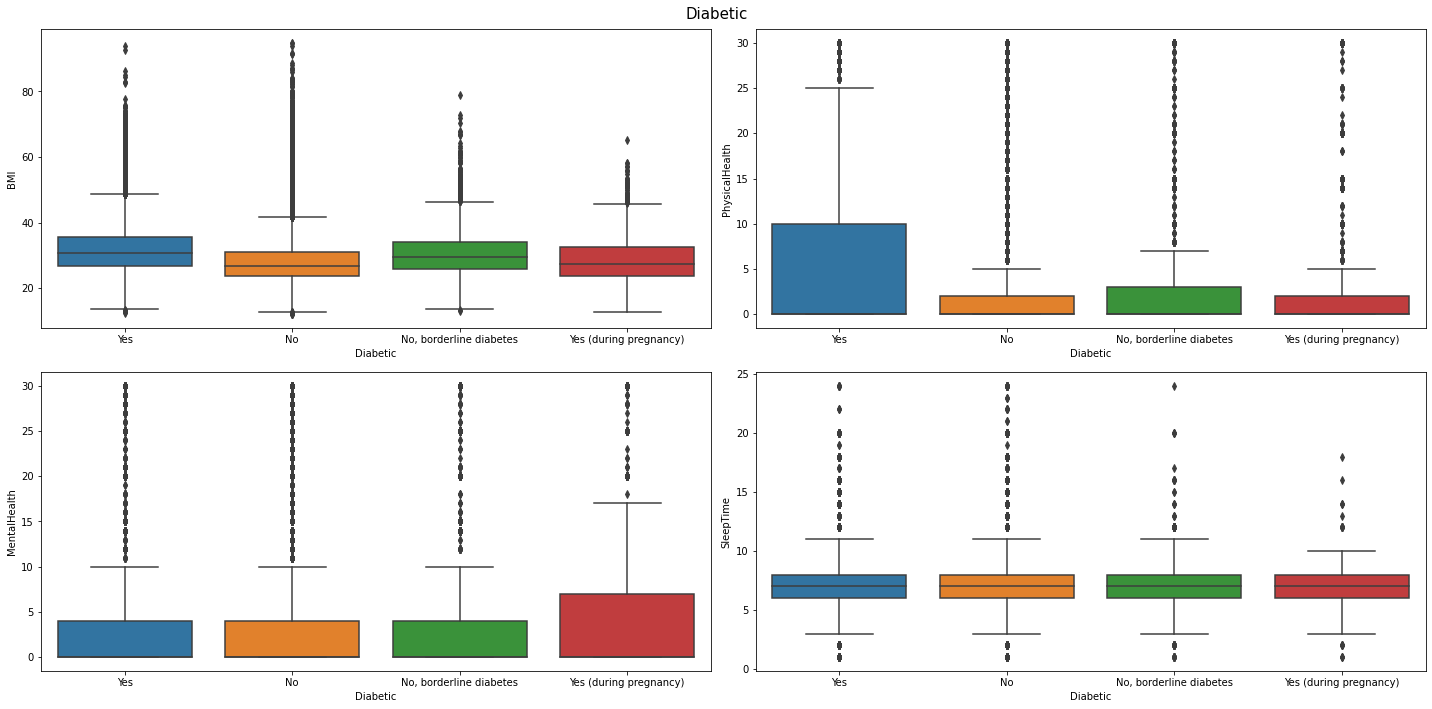

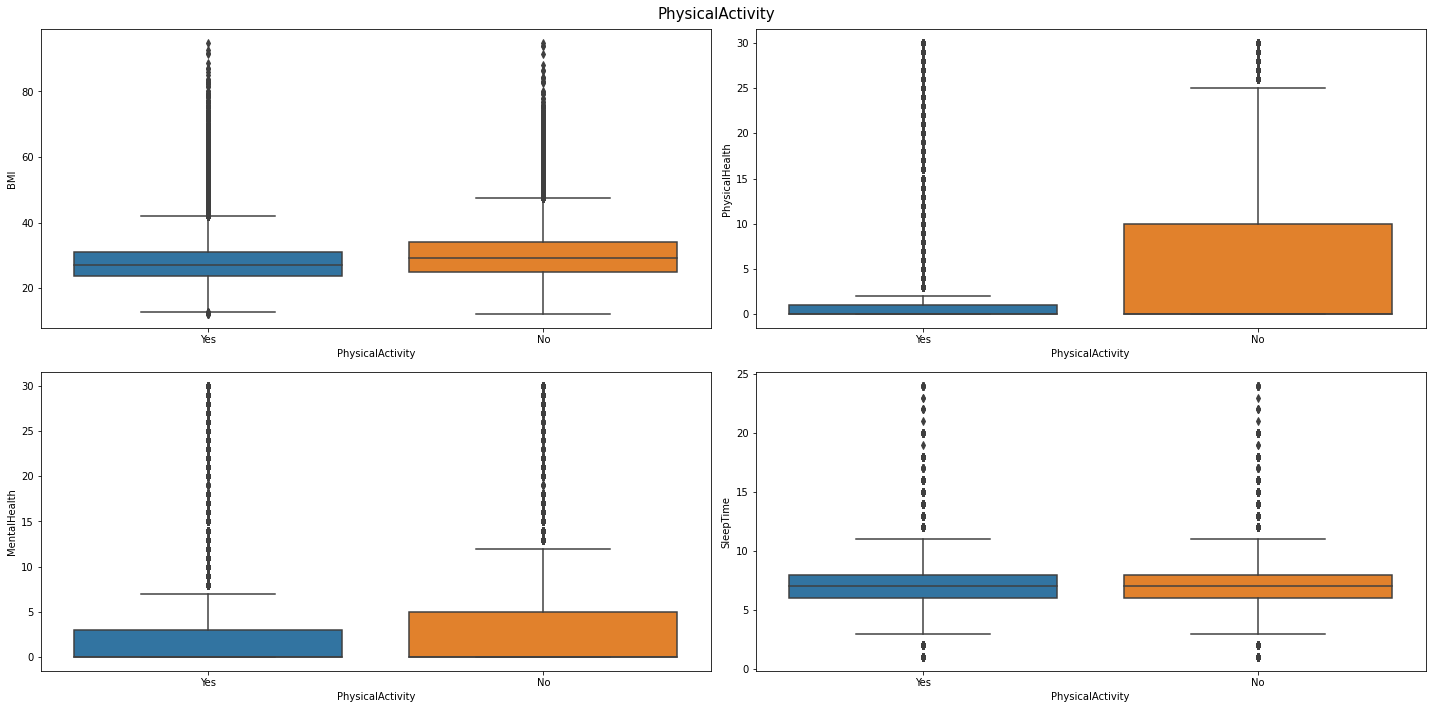

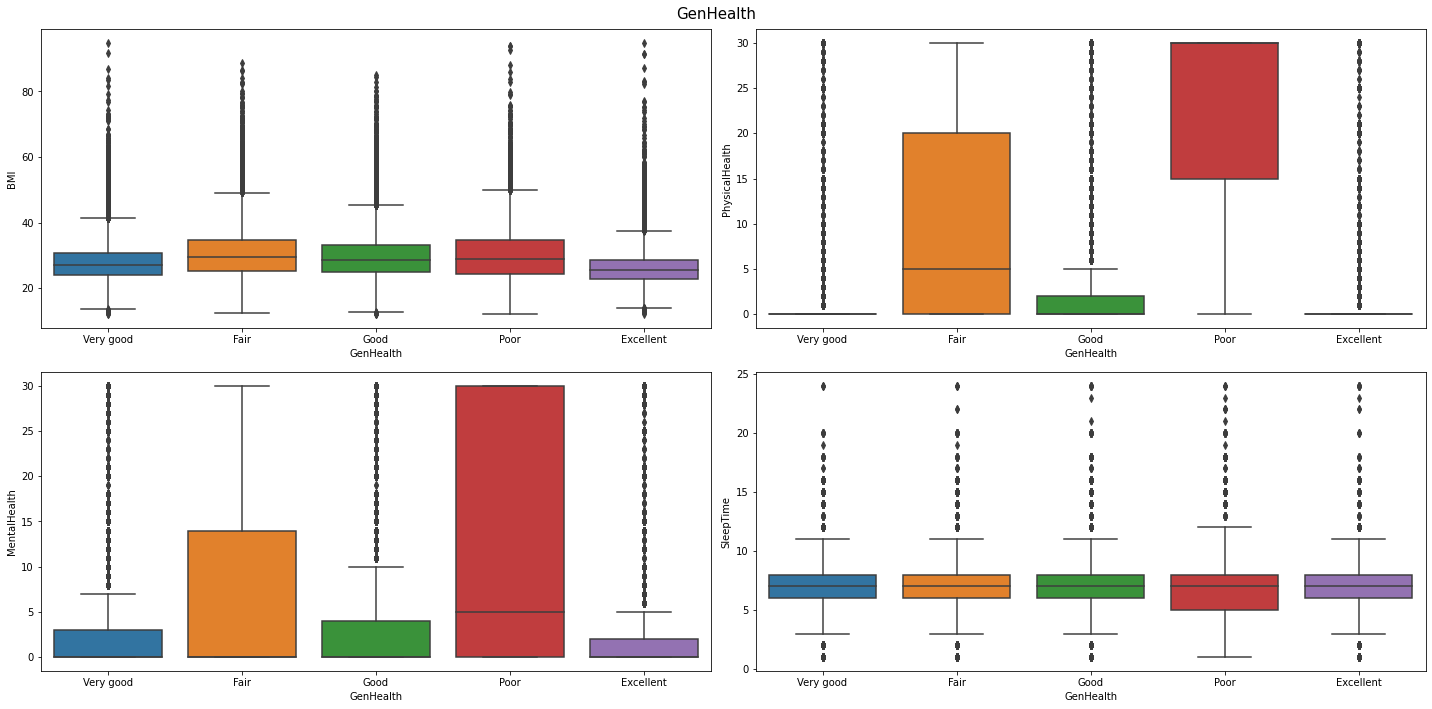

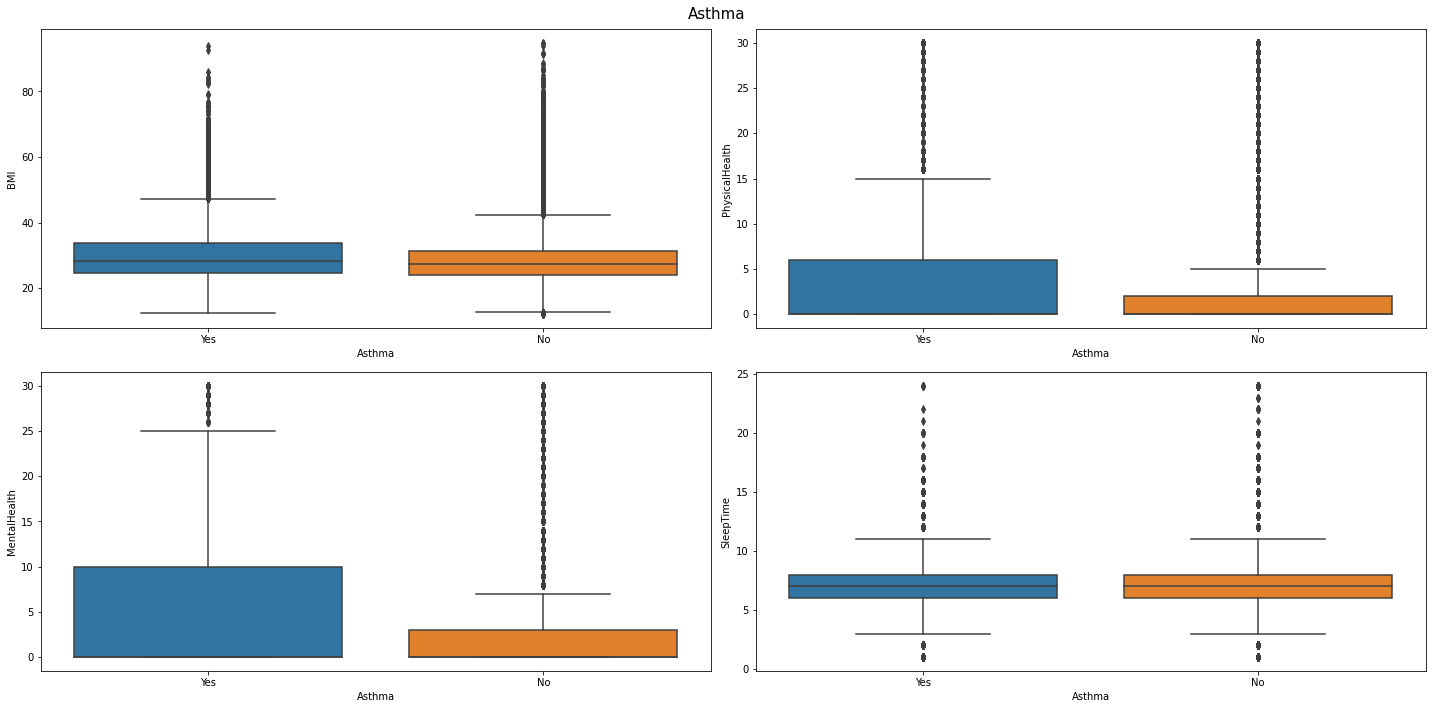

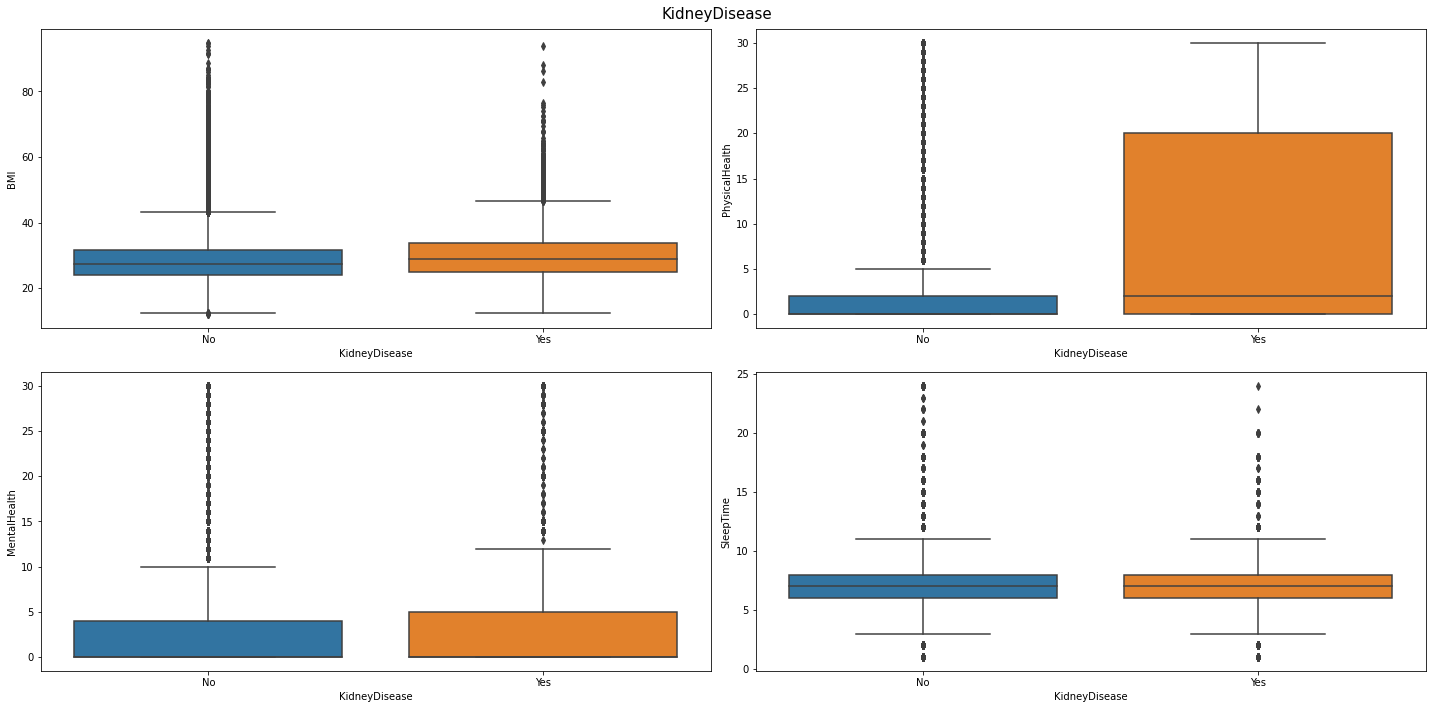

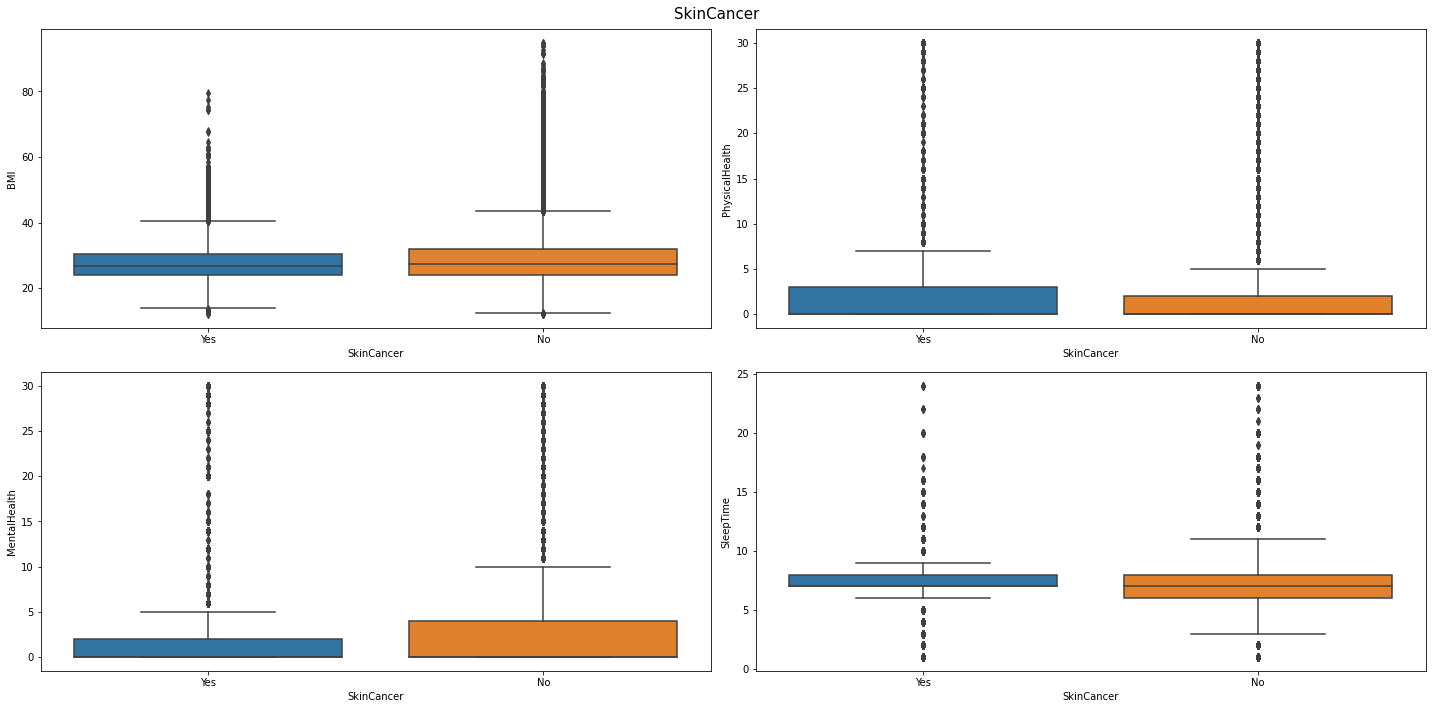

In [24]:
def plot_box_plot(x_axis_feature):
    position_axes = [(0,0), (0,1), (1,0), (1,1)]
    fig, axes = plt.subplots(2,2, figsize=(20,10))
    for position, feature in zip(position_axes, num_attributes):
        sns.boxplot(ax= axes[position],data=df, x=x_axis_feature, y=feature)
        
    fig.suptitle(x_axis_feature, fontsize=15)
    fig.tight_layout()
    
    plt.show()

plot_box_plot('Smoking')
plot_box_plot('AlcoholDrinking')
plot_box_plot('Stroke')
plot_box_plot('DiffWalking')
plot_box_plot('Sex')
plot_box_plot('AgeCategory')
plot_box_plot('Race')
plot_box_plot('Diabetic')
plot_box_plot('PhysicalActivity')
plot_box_plot('GenHealth')
plot_box_plot('Asthma')
plot_box_plot('KidneyDisease')
plot_box_plot('SkinCancer')

**Insights**:
---------------

**Cigarro**:
* Percebemos que aparentemente fumar não influencia no BMI;
* Percebemos que as pessoas que fumam tendem a não se sentir tão bem fisicamente quanto as pessoas não fumam;
* Percebemos que as pessoas que fumam tendem a não se sentir tão bem mentalmente quanto as pessoas não fumam;
* Percebemos que aparentemente fumar não influencia na quantidade de horas dormidas;


**Bebidas Alcoólicas**:
* Percebemos que as pessoas que consomem bebidas alcoólicas tendem a ter BMI mais elevado;
* Percebemos que as pessoas que não consomem bebidas alcoólicas tendem a não se sentir tão bem fisicamente quanto as pessoas que consomem bebidas alcoólicas;
* Percebemos que as pessoas que consomem bebidas alcoólicas tendem a não se sentir tão bem mentalmente quanto as pessoas que não consomem bebidas alcoólicas;
* Percebemos que aparentemente consumir bebida alcoólica não influencia na quantidade de horas dormidas;


**AVC**:
* Percebemos que aparentemente ter tido AVC não influencia no BMI;
* Percebemos que as pessoas que tiveram AVC tendem a não se sentir tão bem fisicamente quanto as pessoas que não tiveram;
* Percebemos que as pessoas que tiveram AVC tendem a não se sentir tão bem mentalmente quanto as pessoas que não tiveram;
* Percebemos que aparentemente a ter tido AVC não influencia na quantidade de horas dormidas;


**Dificuldade de andar ou subir escadas**:
* Percebemos que as pessoas com dificuldade de andar ou subir escadas tendem a ter BMI mais elevado;
* Percebemos que as pessoas com dificuldade de andar ou subir escadas tendem a não se sentir tão bem fisicamente quanto as pessoas que não possuem essas dificuldades;
* Percebemos que as pessoas com dificuldade de andar ou subir escadas tendem a não se sentir tão bem mentalmente quanto as pessoas que não possuem essas dificuldades;
* Percebemos que aparentemente a dificuldade de andar ou subir escadas não influencia na quantidade de horas dormidas;


**Gênero**:
* Percebemos que aparentemente o gênero não influencia no BMI;
* Percebemos que as pessoas de gênero masculino tendem a não se sentir tão bem fisicamente quanto as pessoas de gênero feminino;
* Percebemos que as pessoas de gênero masculino tendem a não se sentir tão bem mentalmente quanto as pessoas de gênero feminino;
* Percebemos que aparentemente o gênero não influencia na quantidade de horas dormidas;


**Faixa etária**:
* Percebemos que as faixas etárias com menor BMI são: 18-24 anos, 80 ou mais anos;
* Percebemos que as pessoas mais velhas tendem a não se sentir tão bem fisicamente quanto as pessoas mais jovens;
* Percebemos que as pessoas mais jovens tendem a não se sentir tão bem mentalmente quanto as pessoas mais velhas;
* Percebemos que aparentemente a idade não influencia na quantidade de horas dormidas;


**Raça**:
* Percebemos que as pessoas asiáticas tendem a ter um menor BMI, enquanto as pessoas pretas tendem a ter um valor maior de BMI;
* Percebemos que as pessoas que têm origem em qualquer um dos povos originários da América do Norte e do Sul (incluindo a América Central) e que mantém afiliação tribal ou ligação com a comunidade tendem a se sentir pior fisicamente quando comparadas as outras pessoas das demais raças, enquanto as pessoas asiáticas tendem a se sentir melhor fisicamente quando comparadas as pessoas das demais raças;
* Percebemos que as pessoas que têm origem em qualquer um dos povos originários da América do Norte e do Sul (incluindo a América Central) e que mantém afiliação tribal ou ligação com a comunidade e as outras raças ("others") não especificadas neste dataset tendem a não se sentir tão bem mentalmente quanto as demais raças (brancos, pretos, hispânicos e asiáticos);
* Percebemos que aparentemente a raça não influencia na quantidade de horas dormidas;


**Prática de exercícios físicos**:
* Percebemos que pessoas que praticam exercícios físicos tendem a ter menor BMI;
* Percebemos que as pessoas que praticam exercícios físicos tendem a se sentir melhor fisicamente do as pessoas que não praticam;
* Percebemos que as pessoas que praticam exercícios físicos tendem a se sentir melhor mentalmente do as pessoas que não praticam;
* Percebemos que aparentemente praticar exercícios não influencia na quantidade de horas dormidas;


**Estado geral de saúde**:
* Percebemos que pessoas que consideram seu estado geral de saúde ruim tendem a ter maior BMI enquanto as pessoas que consideram seu estado de saúde de saúde excelente possuem menor BMI;
* Percebemos que as pessoas com piores estados de saúde são as que se sentem pior fisicamente enquanto as pessoas que se sentem melhor fisicamente são as que se consideram em melhores estados de saúde;
* Percebemos que as pessoas com piores estados de saúde são as que se sentem pior mentalmente enquanto as pessoas que se sentem melhor fisicamente são as que se consideram em melhores estados de saúde;
* Percebemos que as pessoas com estado geral de saúde ruim tendem a dormir uma menor quantidade de horas do que as pessoas dos demais estados de saúde;


**Asma**:
* Percebemos que pessoas que tem asma tendem a ter maior BMI do que as pessoas que não têm;
* Percebemos que as pessoas que tem asma tendem a se sentir pior fisicamente do que as pessoas que não têm;
* Percebemos que as pessoas que tem asma tendem a se sentir pior mentalmente do que as pessoas que não têm;
* Percebemos que aparentemente a asma não influencia na quantidade de horas dormidas;


**Doença renal**:
* Percebemos que pessoas que tem doença renal tendem a ter maior BMI do que as pessoas que não têm;
* Percebemos que as pessoas que tem doença renal tendem a se sentir pior fisicamente do que as pessoas que não têm;
* Percebemos que as pessoas que tem doença renal tendem a se sentir pior mentalmente do que as pessoas que não têm;
* Percebemos que aparentemente a doença renal não influencia na quantidade de horas dormidas;


**Câncer de pele**:
* Percebemos que pessoas que tem câncer de pele tendem a ter menor BMI do que as pessoas que não têm;
* Percebemos que as pessoas que tem câncer de pele tendem a se sentir pior fisicamente do que as pessoas que não têm;
* Percebemos que as pessoas que tem câncer de pele tendem a se sentir melhor mentalmente do que as pessoas que não têm;
* Percebemos que as pessoas que tem câncer de pele possuem um intervalo de quantidade de horas dormidas bem menor do que o intervalo de quantidade de horas dormidas das pessoas que não tem essa doença;

Criaremos uma variável auxiliar com o intuito de realizar algumas análises bivariadas entre a variável 'HeartDisease' e outras variáveis categóricas

In [25]:
df_aux = df.copy()
# Transformando a variável 'HeartDisease' em uma variável binária (1 = doente,0 = não doente)
df_aux.HeartDisease.replace({'Yes':1,'No':0},inplace=True)

#### Pessoas com Doença Cardíaca separadas por Fumantes/Não Fumantes

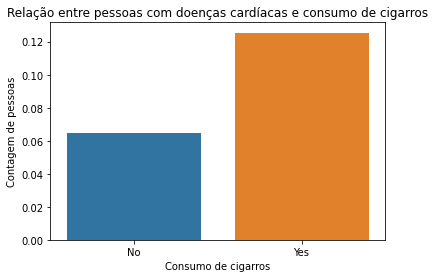

In [26]:
# Este comando nos mostra a contagem de observações de cada categoria utilizando gráfico de barras
sns.barplot(x=df_aux.groupby('Smoking').HeartDisease.mean().index,
            y=df_aux.groupby('Smoking').HeartDisease.mean());
plt.title('Relação entre pessoas com doenças cardíacas e consumo de cigarros');
plt.ylabel('Contagem de pessoas');
plt.xlabel('Consumo de cigarros');

**Insight**: Neste dataset, as **pessoas avaliadas que consumiram cigarros tiveram maior probabilidade de doença cardíaca** do que as pessoas que não consumiram.

#### Pessoas com Doença Cardíaca separadas por Alcoólatras/Não Alcoólatras

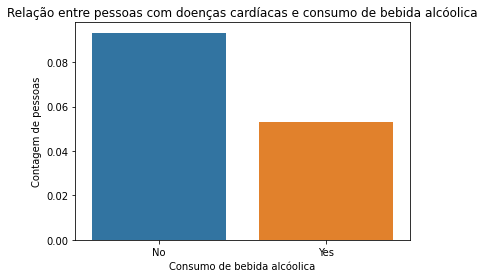

In [27]:
# Este comando nos mostra a contagem de observações de cada categoria utilizando gráfico de barras
sns.barplot(x=df_aux.groupby('AlcoholDrinking').HeartDisease.mean().index,
            y=df_aux.groupby('AlcoholDrinking').HeartDisease.mean());
plt.title('Relação entre pessoas com doenças cardíacas e consumo de bebida alcóolica');
plt.ylabel('Contagem de pessoas');
plt.xlabel('Consumo de bebida alcóolica');

**Insight**: 
Neste dataset, as **pessoas avaliadas que consumiram bebidas alcoólicas tiveram menor probabilidade de doença cardíaca** do que as pessoas que consumiram.

#### Pessoas com Doença Cardíaca separadas por pessoas que tiveram AVC/pessoas que não tiveram

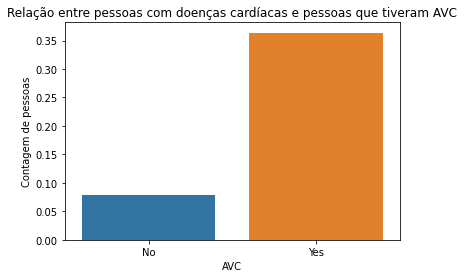

In [28]:
# Este comando nos mostra a contagem de observações de cada categoria utilizando gráfico de barras
sns.barplot(x=df_aux.groupby('Stroke').HeartDisease.mean().index,
            y=df_aux.groupby('Stroke').HeartDisease.mean());
plt.title('Relação entre pessoas com doenças cardíacas e pessoas que tiveram AVC');
plt.ylabel('Contagem de pessoas');
plt.xlabel('AVC');

**Insight**: Neste dataset, as **pessoas avaliadas que tiveram AVC tiveram maior probabilidade de doença cardíaca** do que as pessoas que tiveram AVC.

#### Pessoas com Doença Cardíaca separadas por pessoas com dificuldade para caminhar ou subir escadas/pessoas sem dificuldades

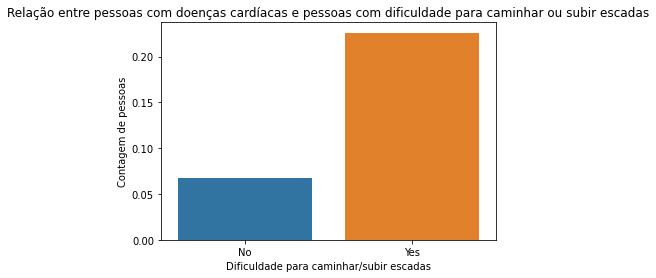

In [29]:
# Este comando nos mostra a contagem de observações de cada categoria utilizando gráfico de barras
sns.barplot(x=df_aux.groupby('DiffWalking').HeartDisease.mean().index,
            y=df_aux.groupby('DiffWalking').HeartDisease.mean());
plt.title('Relação entre pessoas com doenças cardíacas e pessoas com dificuldade para caminhar \
ou subir escadas');
plt.ylabel('Contagem de pessoas');
plt.xlabel('Dificuldade para caminhar/subir escadas');

**Insight**: Neste dataset, as **pessoas avaliadas que tinham dificuldade para caminhar ou subir escadas tiveram maior probabilidade de doença cardíaca** do que as pessoas que não tinham essa dificuldade.

#### Pessoas com Doença Cardíaca separadas por Sexo

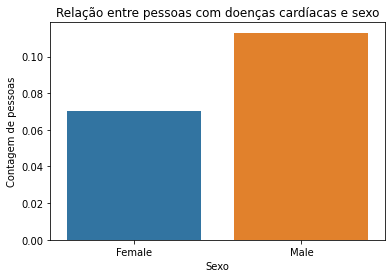

In [30]:
# Este comando nos mostra a contagem de observações de cada categoria utilizando gráfico de barras
sns.barplot(x=df_aux.groupby('Sex').HeartDisease.mean().index,y=df_aux.groupby('Sex').HeartDisease.mean());
plt.title('Relação entre pessoas com doenças cardíacas e sexo');
plt.ylabel('Contagem de pessoas');
plt.xlabel('Sexo');

**Insight**: Neste dataset, as **pessoas avaliadas que pertencem ao gênero masculino tiveram maior probabilidade de doença cardíaca** do que as pessoas pertencentes ao gênero feminino.

#### Pessoas com Doença Cardíaca separadas por Faixa Etária

In [31]:
# DataFrames com valores das medidas para sexo agrupadas por faixa etária
count_agecategory = pd.DataFrame(df.groupby(['AgeCategory','HeartDisease']).BMI.count()).reset_index()
# Renomear coluna do DataFrame
count_agecategory.rename(columns={'BMI':'Contagem'},inplace=True)
# Comando utilizado para esconder os índices das linhas
count_agecategory.sort_values(["AgeCategory"]).style.hide_index()
# Ordenador 
ordenador = ['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69',
                    '70-74','75-79','80 or older']
# Ordenamento do DataFrame
count_agecategory.AgeCategory = count_agecategory.AgeCategory.astype("category")
count_agecategory.AgeCategory = count_agecategory.AgeCategory.cat.set_categories(ordenador)

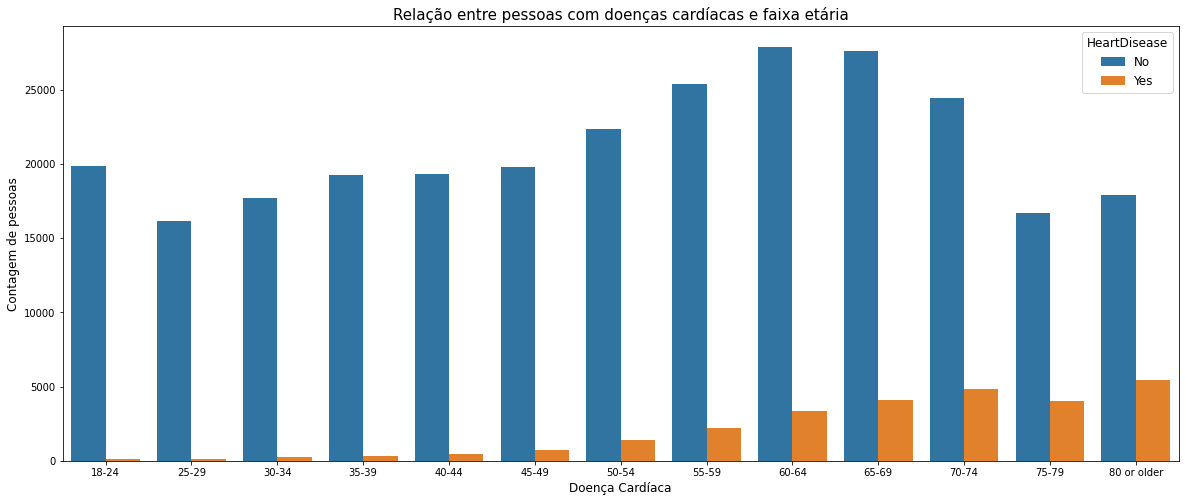

In [32]:
plt.figure(figsize=(20,8))
# Este comando nos mostra a contagem de observações de cada categoria utilizando gráfico de barras
sns.barplot(data=count_agecategory,x='AgeCategory',y='Contagem',hue='HeartDisease');
plt.title('Relação entre pessoas com doenças cardíacas e faixa etária',size=15);
plt.ylabel('Contagem de pessoas',fontsize=12);
plt.xlabel('Doença Cardíaca',fontsize=12);
plt.legend(title='HeartDisease',title_fontsize=12,fontsize=12);

**Insight**: Notamos uma clara tendência de aumento nos casos de doença cardíaca com o avanço da idade.

#### Pessoas com Doença Cardíaca separadas por Raça

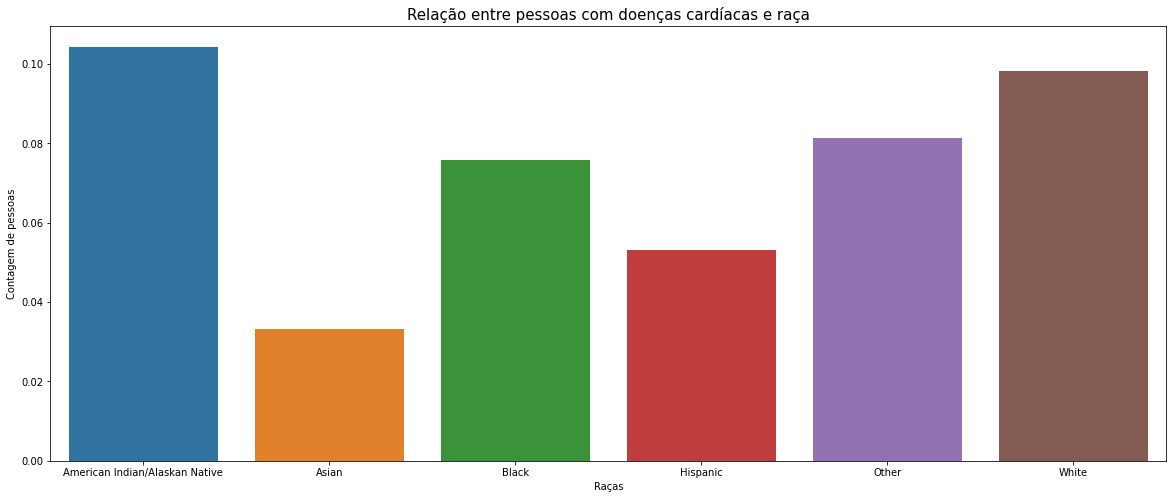

In [33]:
plt.figure(figsize=(20,8))
# Este comando nos mostra a contagem de observações de cada categoria utilizando gráfico de barras
sns.barplot(x=df_aux.groupby('Race').HeartDisease.mean().index,y=
            df_aux.groupby('Race').HeartDisease.mean());
plt.title('Relação entre pessoas com doenças cardíacas e raça',size=15);
plt.ylabel('Contagem de pessoas');
plt.xlabel('Raças');

**Insight**: Notamos que as pessoas que têm origem em qualquer um dos povos originários da América do Norte e do Sul (incluindo a América Central) e que mantém afiliação tribal ou ligação com a comunidade apresentaram a maior quantidade de casos de doença cardíaca com base neste dataset. Enquanto os asiáticos apresentaram a menor quantidade.

#### Pessoas com Doença Cardíaca separadas por diagnóstico de diabetes

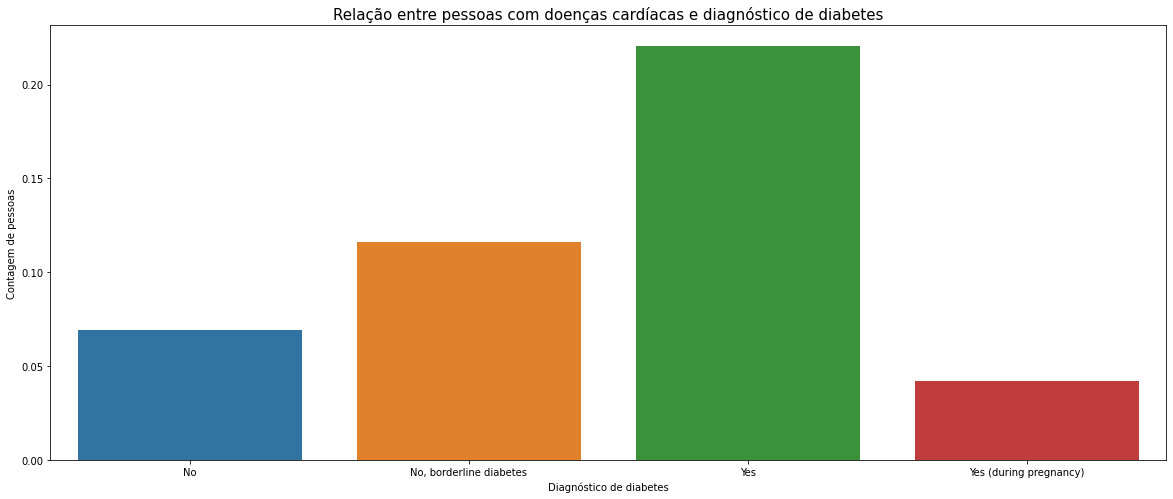

In [34]:
plt.figure(figsize=(20,8))
# Este comando nos mostra a contagem de observações de cada categoria utilizando gráfico de barras
sns.barplot(x=df_aux.groupby('Diabetic').HeartDisease.mean().index,y=
            df_aux.groupby('Diabetic').HeartDisease.mean());
plt.title('Relação entre pessoas com doenças cardíacas e diagnóstico de diabetes',size=15);
plt.ylabel('Contagem de pessoas');
plt.xlabel('Diagnóstico de diabetes');

**Insight**: Notamos uma maior quantidade de casos de doença cardíaca em pessoas que têm diabetes ou pré diabétes quando comparado a quantidade de casos em pessoas não diabéticas.

#### Pessoas com Doença Cardíaca separadas por praticantes de atividade física nos últimos 30 dias/não praticantes

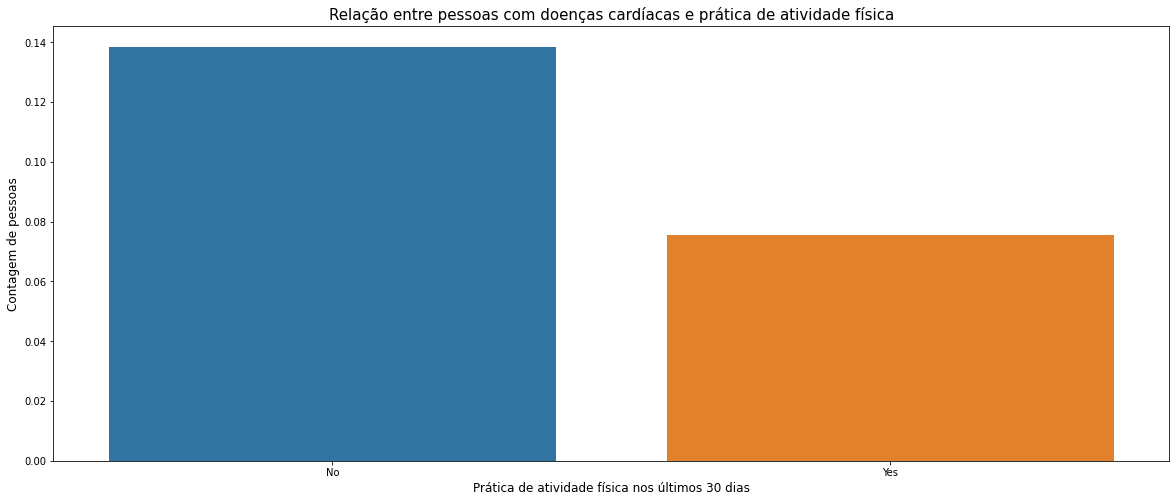

In [35]:
plt.figure(figsize=(20,8))
# Este comando nos mostra a contagem de observações de cada categoria utilizando gráfico de barras
sns.barplot(x=df_aux.groupby('PhysicalActivity').HeartDisease.mean().index,y=
            df_aux.groupby('PhysicalActivity').HeartDisease.mean());
plt.title('Relação entre pessoas com doenças cardíacas e prática de atividade física',size=15);
plt.ylabel('Contagem de pessoas',fontsize=12);
plt.xlabel('Prática de atividade física nos últimos 30 dias',fontsize=12);

**Insight**: Notamos que há uma maior quantidade de casos de doença cardíaca em pessoas que não praticam exercícios em relação às pessoas que praticam exercícios.

#### Pessoas com Doença Cardíaca separadas por condição geral de saúde

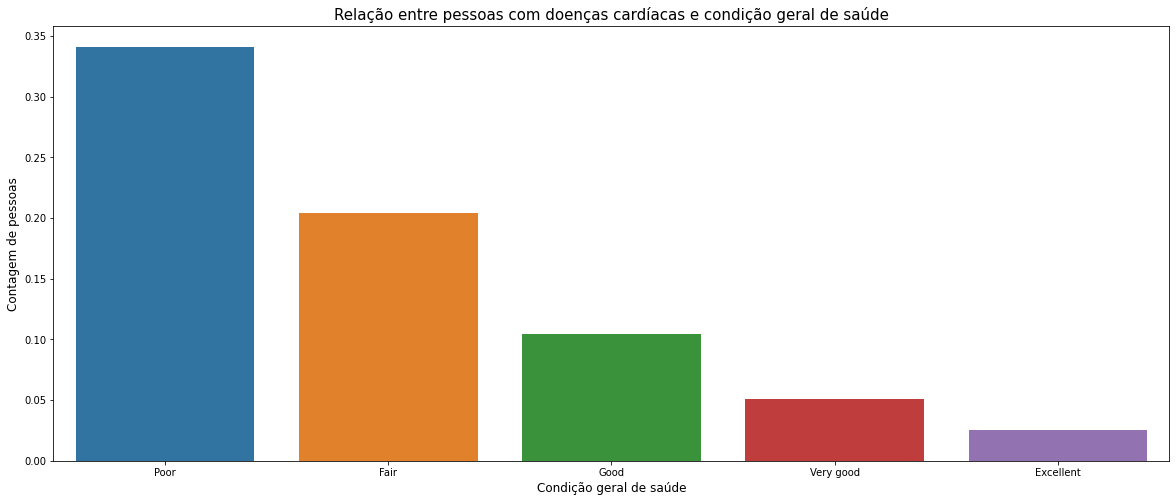

In [36]:
plt.figure(figsize=(20,8))
ordenador_boxplot = ['Poor','Fair','Good','Very good','Excellent']
# Este comando nos mostra a contagem de observações de cada categoria utilizando gráfico de barras
sns.barplot(x=df_aux.groupby('GenHealth').HeartDisease.mean().index,y=
            df_aux.groupby('GenHealth').HeartDisease.mean(),order=ordenador_boxplot);
plt.title('Relação entre pessoas com doenças cardíacas e condição geral de saúde',size=15);
plt.ylabel('Contagem de pessoas',fontsize=12);
plt.xlabel('Condição geral de saúde',fontsize=12);

**Insight**: Notamos que à medida que se melhora a condição geral de saúde, há redução na quantidade de casos de doença cardíaca.

#### Pessoas com Doença Cardíaca separadas por pessoas asmáticas/não asmáticas

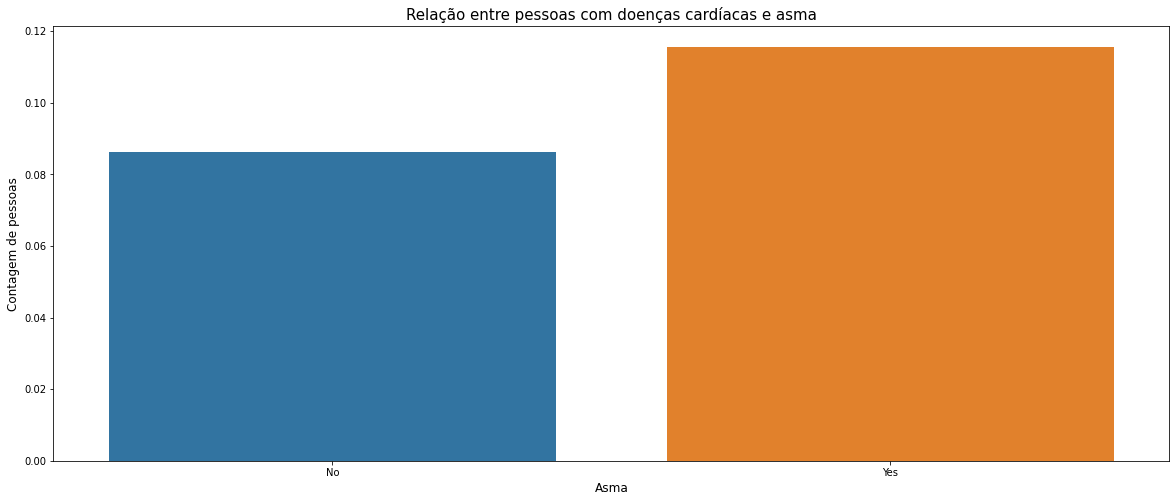

In [37]:
plt.figure(figsize=(20,8))
# Este comando nos mostra a contagem de observações de cada categoria utilizando gráfico de barras
sns.barplot(x=df_aux.groupby('Asthma').HeartDisease.mean().index,y=
            df_aux.groupby('Asthma').HeartDisease.mean());
plt.title('Relação entre pessoas com doenças cardíacas e asma',size=15);
plt.ylabel('Contagem de pessoas',fontsize=12);
plt.xlabel('Asma',fontsize=12);

**Insight**: Notamos que pessoas asmáticas apresentaram uma maior quantidade de casos de doença cardíaca do que pessoas não asmáticas.

#### Pessoas com Doença Cardíaca separadas por pessoas com doença renal/pessoas sem doença real

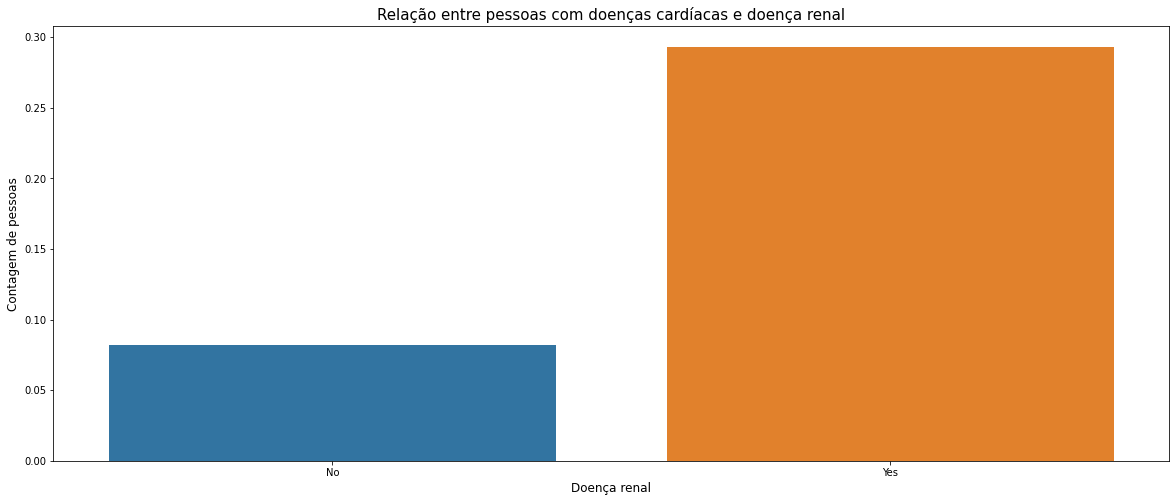

In [38]:
plt.figure(figsize=(20,8))
# Este comando nos mostra a contagem de observações de cada categoria utilizando gráfico de barras
sns.barplot(x=df_aux.groupby('KidneyDisease').HeartDisease.mean().index,y=
            df_aux.groupby('KidneyDisease').HeartDisease.mean());
plt.title('Relação entre pessoas com doenças cardíacas e doença renal',size=15);
plt.ylabel('Contagem de pessoas',fontsize=12);
plt.xlabel('Doença renal',fontsize=12);

**Insight**: Notamos que pessoas com doença renal apresentaram uma maior quantidade de casos de doença cardíaca do que pessoas sem doença renal.

#### Pessoas com Doença Cardíaca separadas por pessoas com câncer de pele/pessoas sem câncer de pele

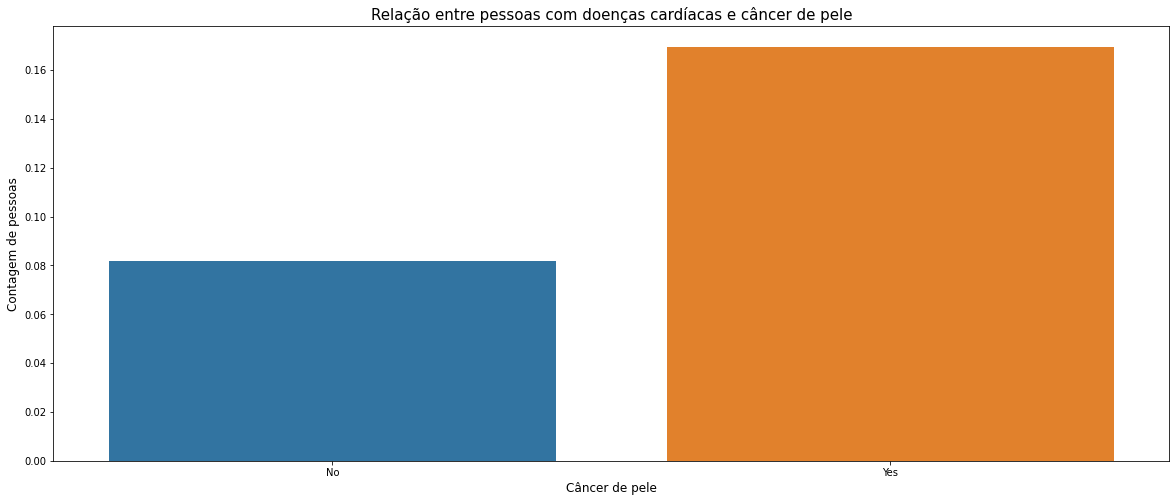

In [39]:
plt.figure(figsize=(20,8))
# Este comando nos mostra a contagem de observações de cada categoria utilizando gráfico de barras
sns.barplot(x=df_aux.groupby('SkinCancer').HeartDisease.mean().index,y=
            df_aux.groupby('SkinCancer').HeartDisease.mean());
plt.title('Relação entre pessoas com doenças cardíacas e câncer de pele',size=15);
plt.ylabel('Contagem de pessoas',fontsize=12);
plt.xlabel('Câncer de pele',fontsize=12);

**Insight**: Notamos que pessoas com câncer de pele apresentaram uma maior quantidade de casos de doença cardíaca do que pessoas sem câncer de pele.

### Análise Multivariada

#### Distribuição de BMI separado por doença cardíaca e sexo

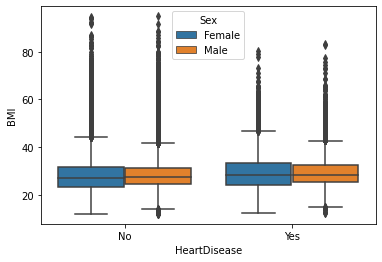

In [40]:
sns.boxplot(x='HeartDisease',y='BMI',hue='Sex',data=df);

Podemos notar que a distribuição de BMI para o sexo feminino é menos concentrada do que a distribuição para o sexo masculino, tanto para as pessoas com doença cardíaca quanto para as pessoas que não têm. Isso significa que o intervalo entre o valor máximo e mínimo de BMI para o sexo feminino é menor do que o intervalo para o sexo masculino. Além disso, notamos que os valores de BMI para ambos os sexos para pessoas com doença cardíaca são levemente superiores aos valores de BMI para pessoas sem essa doença.

#### Distribuição de BMI separado por fumante e sexo 

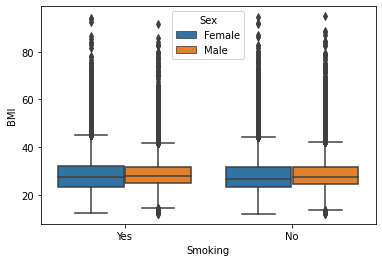

In [41]:
sns.boxplot(x='Smoking',y='BMI',hue='Sex',data=df);

Podemos notar que a distribuição de BMI para o sexo feminino é menos concentrada do que a distribuição para o sexo masculino, tanto para as pessoas que fumaram acima de 100 cigarros ao longo da vida quanto para as pessoas que não ultrapassaram esse limite. Isso significa que o intervalo entre o valor máximo e mínimo de BMI para o sexo feminino é menor do que o intervalo para o sexo masculino. Além disso, vemos que a mediana do conjunto de dados para o sexo masculino é maior do que a mediana para o sexo feminino em ambas as condições, fumante ou não fumante.

#### Distribuição de BMI separado por pessoas alcoólatras e sexo 

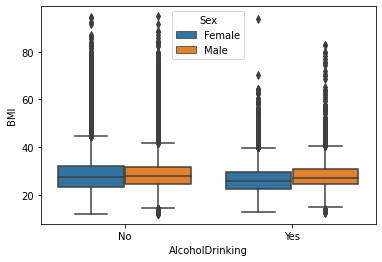

In [42]:
sns.boxplot(x='AlcoholDrinking',y='BMI',hue='Sex',data=df);

Podemos notar que a distribuição de BMI para o sexo feminino é menos concentrada do que a distribuição para o sexo masculino para as pessoas que não consomem bebidas alcóolicas. Em relação as pessoas que consomem bebidas alcóolicas, verificamos que as pessoas do sexo masculino apresentam um maior BMI do que as pessoas do sexo feminino. 

#### Distribuição de BMI separado por pessoas que tiveram AVC e por sexo

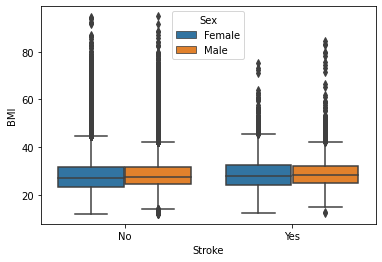

In [43]:
sns.boxplot(x='Stroke',y='BMI',hue='Sex',data=df);

Podemos notar que a distribuição de BMI para o sexo feminino é menos concentrada do que a distribuição para o sexo masculino, tanto para as pessoas que tiveram AVC quanto para as pessoas que não tiveram

#### Distribuição de BMI separado por dificuldade de caminhar/subir escadas e sexo

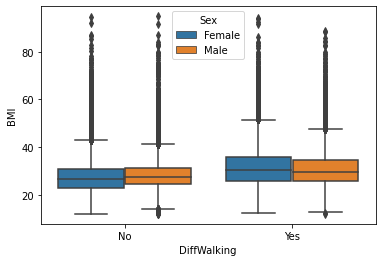

In [44]:
sns.boxplot(x='DiffWalking',y='BMI',hue='Sex',data=df);

Podemos notar que a distribuição de BMI para as pessoas que possuem dificuldade para caminhar ou subir escadas é menos concentrada do que a distribuição para as pessoas que não apresentam essa dificuldade, tanto para o sexo masculino quanto para o sexo feminino. Além disso, notamos que as pessoas que apresentam essa dificuldade tiveram maiores valores de BMI do que as pessoas que não têm essa dificuldade. 

#### Distribuição de BMI separado por faixa etária e sexo

In [45]:
# Identificar as valores únicos da coluna AgeCategory
df.AgeCategory.unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

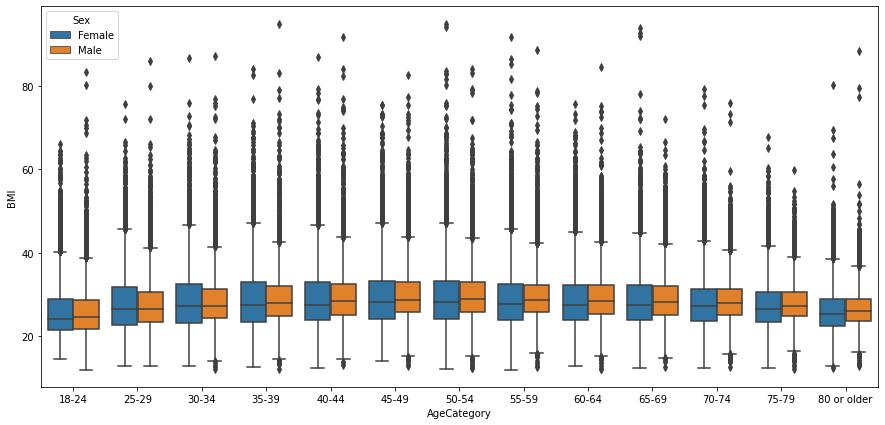

In [46]:
plt.figure(figsize=(15,7))
# Lista para ordenar a exibição do boxplot
ordenador_boxplot = ['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69',
                    '70-74','75-79','80 or older']
sns.boxplot(x='AgeCategory',y='BMI',hue='Sex',data=df,order=ordenador_boxplot);

Podemos notar que para todas as faixas etárias, a distribuição de BMI é menos concentrada para o sexo feminino. Além disso, é possível notar que todas as faixas etárias apresentam dados "outlier". Algumas faixas etárias apresentam "outliers" abaixo dos limites inferiores sendo a maioria deles para o sexo masculino. O único "outlier" abaixo do limite inferior para o sexo feminino ocorre para a faixa etária de 80 anos ou mais

In [47]:
# DataFrames com valores das medidas para sexo agrupadas por faixa etária
medianas_age_category_masculino = pd.DataFrame(df[df.Sex=='Male'].groupby('AgeCategory').BMI.median()).reset_index()
medianas_age_category_feminino  = pd.DataFrame(df[df.Sex=='Female'].groupby('AgeCategory').BMI.median()).reset_index()

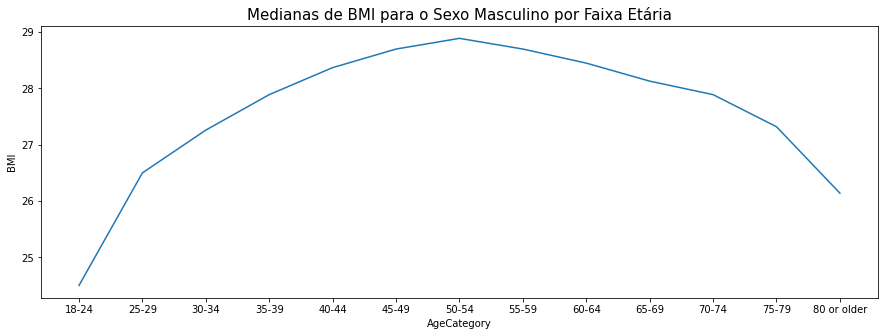

In [48]:
# Plotagem em gráfico de linhas
plt.figure(figsize=(15,5))
plt.title('Medianas de BMI para o Sexo Masculino por Faixa Etária',size=15)
sns.lineplot(x='AgeCategory',y='BMI',data=medianas_age_category_masculino);

Notamos que há um aumento na mediana da variável BMI desde a faixa etária de 18 a 24 anos até a faixa etária de 50 a 54 anos, em seguida, notamos uma redução até a última faixa etária

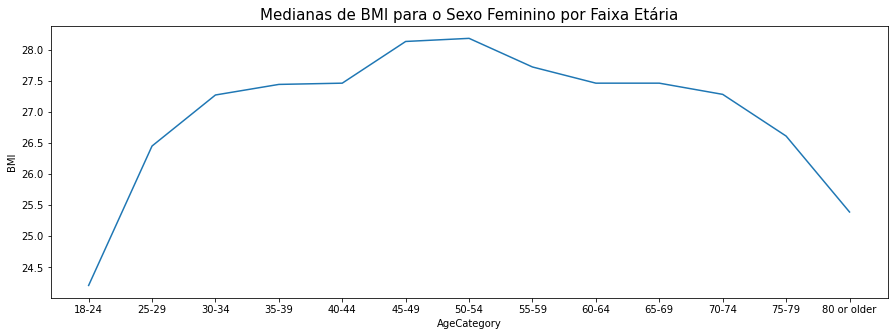

In [49]:
# Plotagem em gráfico de linhas
plt.figure(figsize=(15,5))
plt.title('Medianas de BMI para o Sexo Feminino por Faixa Etária',size=15)
sns.lineplot(x='AgeCategory',y='BMI',data=medianas_age_category_feminino);

Notamos, da mesma forma que para o sexo masculino, há um aumento na mediana da variável BMI desde a faixa etária de 18 a 24 anos até a faixa etária de 50 a 54 anos, em seguida, notamos uma redução até a última faixa etária, entretanto, diferentemente do que ocorre para o sexo masculino onde o aumento e a redução da mediana de BMI ocorre de forma mais uniforme, se assemelhando geometricamente a uma parábola, para o sexo feminino tanto o aumento quanto a redução da mediana de BMI apresenta algumas oscilações.

#### Distribuição de BMI separado por raça e sexo

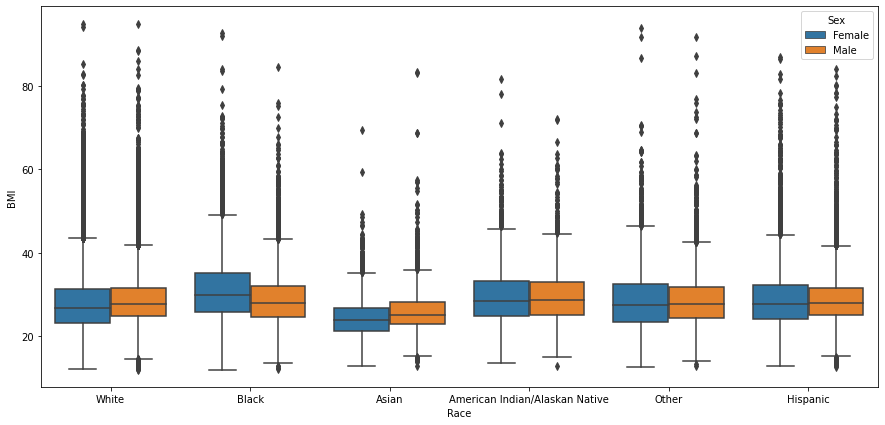

In [50]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Race',y='BMI',hue='Sex',data=df);

Podemos notar que a distribuição de BMI para a raça branca é mais concentrada para o sexo masculino do que para o sexo feminino, a mediana para o sexo masculino é maior do que para o sexo feminino. Em relação à raça preta,há valores mais altos de BMI para o sexo feminino do que para o sexo masculino. Para a raça asiática, notamos valores mais altos de BMI para o sexo masculino do que para o sexo feminino. Para as raças de nativos índios americanos e do Alaska, outros e espânicos notamos que as medianas são bem próximas entre os sexos masculinos e femininos, além disso, verificamos que as distribuições de BMI são menos concentradas para o sexo feminino 

#### Distribuição de BMI separado por diagnóstico de diabetes e sexo

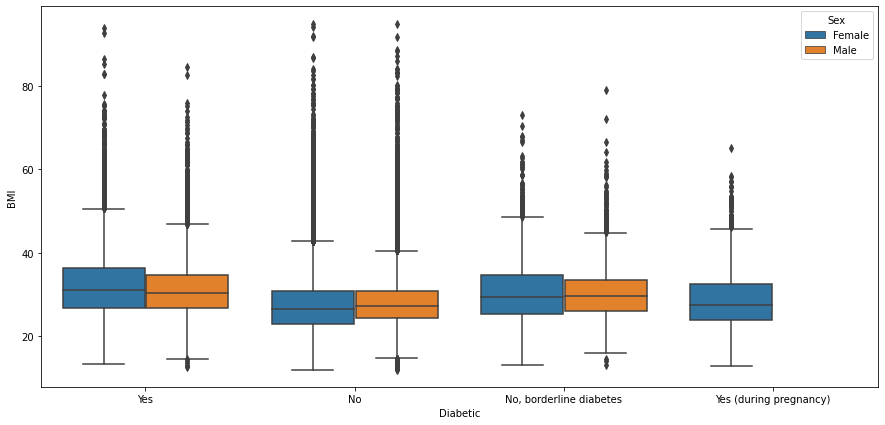

In [51]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Diabetic',y='BMI',hue='Sex',data=df);

Podemos notar que para os pacientes diabéticos, não diabéticos e em pré-diabetes, as distribuições da variável BMI são menos concentradas para o sexo feminino quando comparadas às distribuições para o sexo masculino. Percebemos também que os valores de BMI para ambos os sexos tendem a ser maiores em pessoas com diabetes e em pré-diabéticas do que em pessoas não diabéticas.

#### Distribuição de BMI separado por praticantes de atividade física e por sexo

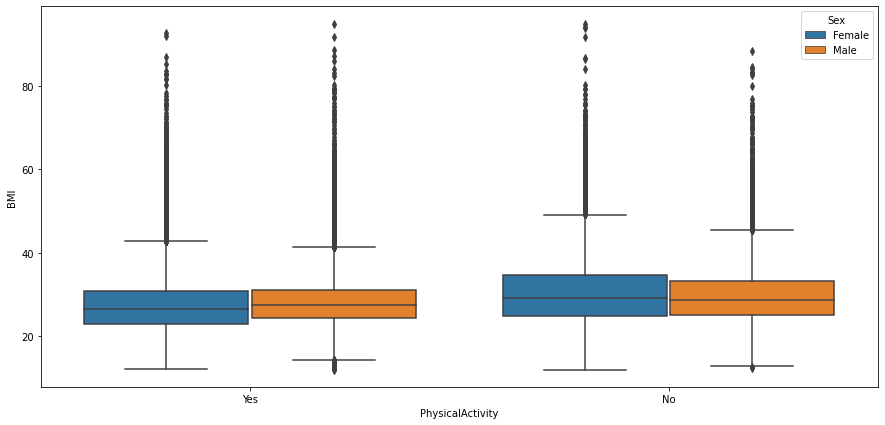

In [52]:
plt.figure(figsize=(15,7))
sns.boxplot(x='PhysicalActivity',y='BMI',hue='Sex',data=df);

Podemos afirmar que a distribuição da variável BMI, tanto para as pessoas que praticaram atividade física nos últimos 30 dias quanto para as que não praticam, foi mais concentrada para o sexo masculino do que para o sexo feminino. Notamos também que os valores de BMI foram maiores para as pessoas que não praticaram atividade física.

#### Distribuição de BMI separado por condição de saúde e por sexo

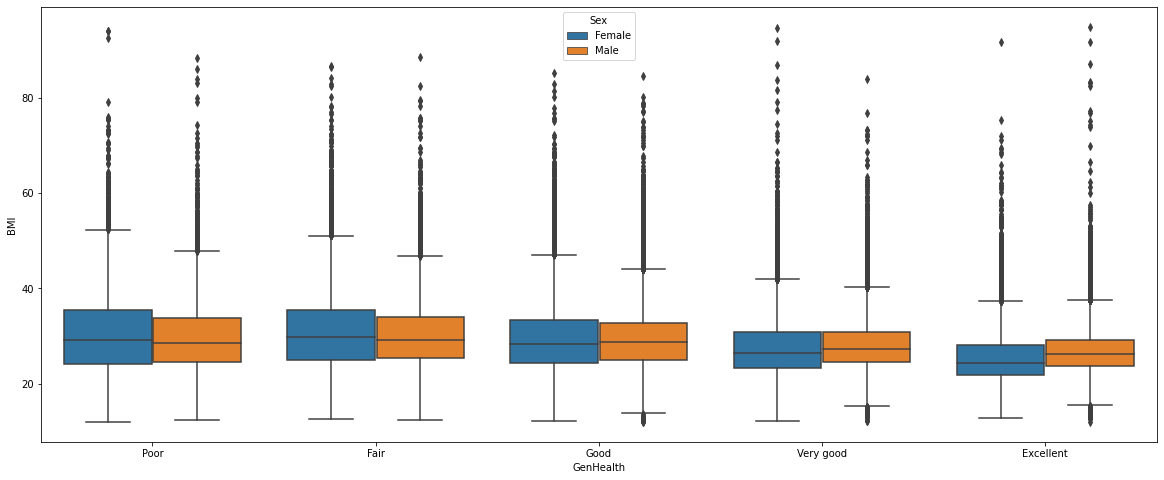

In [53]:
plt.figure(figsize=(20,8))
ordenador_boxplot = ['Poor','Fair','Good','Very good','Excellent']
sns.boxplot(x='GenHealth',y='BMI',hue='Sex',data=df,order=ordenador_boxplot);

Podemos afirmar que as pessoas que se consideram em excelente estado de saúde são as que possuem os menores valores de BMI, sendo que para o sexo feminino os valores de BMI são ainda menores do que os valores para o sexo masculino.

In [54]:
# DataFrames com valores das medidas para sexo agrupadas por faixa etária
medianas_genhealth_masculino = pd.DataFrame(df[df.Sex=='Male'].groupby('GenHealth').BMI.median()).reset_index()
medianas_genhealth_feminino  = pd.DataFrame(df[df.Sex=='Female'].groupby('GenHealth').BMI.median()).reset_index()

In [55]:
# Ordenamento do DataFrame
medianas_genhealth_masculino.GenHealth = medianas_genhealth_masculino.GenHealth.astype("category")
medianas_genhealth_feminino.GenHealth  = medianas_genhealth_feminino.GenHealth.astype("category")
medianas_genhealth_masculino.GenHealth = medianas_genhealth_masculino.GenHealth.cat.set_categories(ordenador_boxplot)
medianas_genhealth_feminino.GenHealth  = medianas_genhealth_feminino.GenHealth.cat.set_categories(ordenador_boxplot)
# Comando utilizado para esconder os índices das linhas
medianas_genhealth_masculino.sort_values(["GenHealth"]).style.hide_index();
medianas_genhealth_feminino.sort_values(["GenHealth"]).style.hide_index();

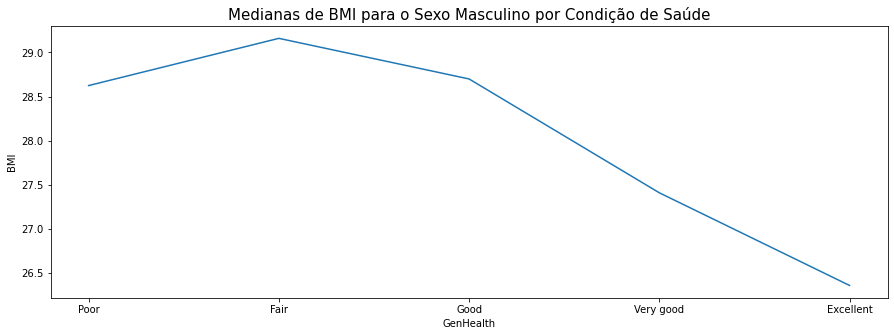

In [56]:
# Plotagem em gráfico de linhas
plt.figure(figsize=(15,5))
plt.title('Medianas de BMI para o Sexo Masculino por Condição de Saúde',size=15)
sns.lineplot(x='GenHealth',y='BMI',data=medianas_genhealth_masculino);

Notamos que desde a condição de saúde "Fair" - Razoável até a condição de saúde excelente tem-se uma redução expressiva nos valores das medianas das distribuições de dados atingindo, dessa forma, o menor valor na melhor condição de saúde.

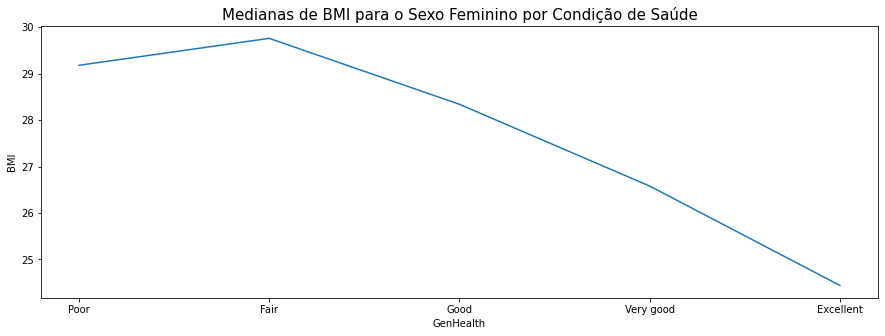

In [57]:
# Plotagem em gráfico de linhas
plt.figure(figsize=(15,5))
plt.title('Medianas de BMI para o Sexo Feminino por Condição de Saúde',size=15)
sns.lineplot(x='GenHealth',y='BMI',data=medianas_genhealth_feminino);

O mesmo padrão observado na análise dos valores das medianas para o sexo masculino ocorre para o sexo feminino.

#### Distribuição de BMI separado por asmáticos e por sexo

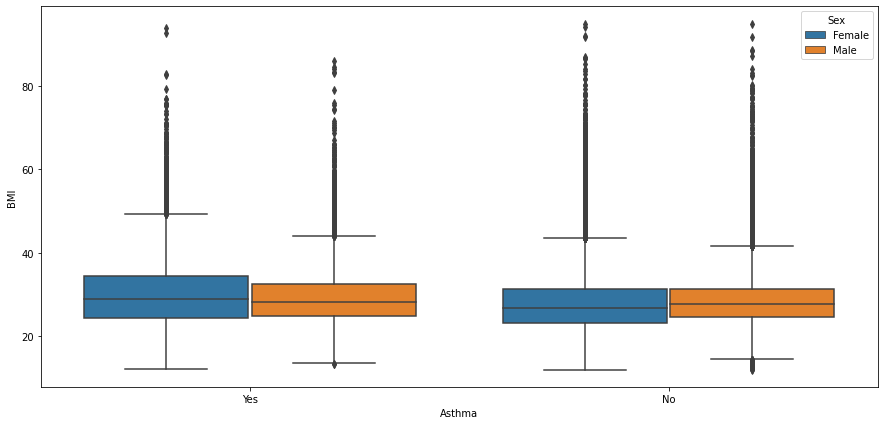

In [58]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Asthma',y='BMI',hue='Sex',data=df);

Podemos afirmar que a distribuição da variável BMI, tanto para as pessoas asmáticas quanto para as que não asmáticas, foi mais concentrada para o sexo masculino do que para o sexo feminino.

#### Distribuição de BMI separado por diagnóstico de doença renal e por sexo

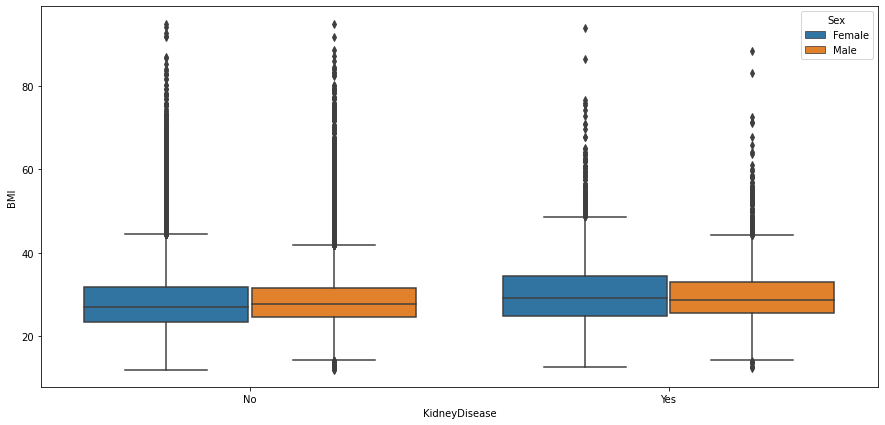

In [59]:
plt.figure(figsize=(15,7))
sns.boxplot(x='KidneyDisease',y='BMI',hue='Sex',data=df);

Podemos afirmar que a distribuição da variável BMI, tanto para as pessoas com doença renal quanto para as que não doentes, foi mais concentrada para o sexo masculino do que para o sexo feminino. Além disso, notamos que os valores de BMI para as pessoas com doença renal foram maiores quando comparados ao valores de BMI para as pessoas não doentes.

#### Distribuição de BMI separado por diagnóstico de câncer de pele e por sexo

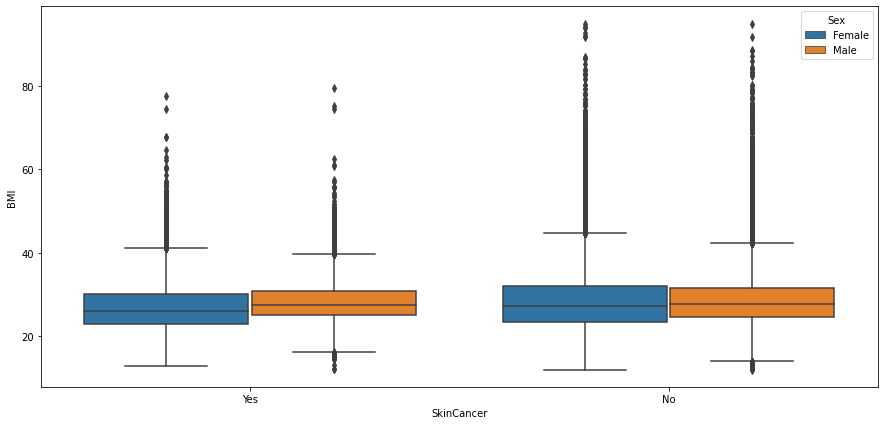

In [60]:
plt.figure(figsize=(15,7))
sns.boxplot(x='SkinCancer',y='BMI',hue='Sex',data=df);

Podemos afirmar que a distribuição da variável BMI, tanto para as pessoas com câncer de pele quanto para as que não doentes, foi mais concentrada para o sexo masculino do que para o sexo feminino. Além disso, notamos que os valores de BMI para os homens com câncer de pele foram maiores quando comparados ao valores de BMI para as mulheres na mesma situação.

In [61]:
#media_bmi_doentes     = df.BMI[df.HeartDisease == 'Yes'].median()
#media_bmi_nao_doentes = df.BMI[df.HeartDisease == 'No'].median()
#_                     = sns.kdeplot('BMI',data=df,shade=True,hue='HeartDisease')
#_                     = plt.axvline(x=media_bmi_doentes, ymin=0, ymax=1, label='Média Doentes',color='blue')
#_                     = plt.axvline(x=media_bmi_nao_doentes, ymin=0, ymax=1, label='Média Não Doentes',color='orange')
#_                     = plt.legend(['No','Yes','Media de BMI - Doentes','Media de BMI - Não Doentes'],title='Heart Disease')
# **Conclusão**: Notamos que a  média de BMI para as pessoas com doença cardíaca é bem próxima da média de BMI para as pessoas sem doença cardíaca

**A partir da análise de dados nós podemos chegar as seguintes conclusões:**

* Pessoas que consomem cigarros tiveram pior saúde do coração;
* Pessoas que consomem bebidas alcoólicas não apresentaram pior condição cardíaca do que as pessoas que não consomem;
* Pessoas que tiveram AVC apresentaram pior saúde do coração;
* Pessoas com dificuldade para caminhar ou subir escadas apresentaram pior condição cardíaca;
* Pessoas do sexo masculino apresentaram uma maior probabilidade de doença cardíaca;
* Pessoas mais velhas apresentaram maior quantidade de casos de doença cardíaca;
* Pessoas que têm origem em qualquer um dos povos originários da América do Norte e do Sul (incluindo a América Central) e que mantém afiliação tribal ou ligação com a comunidade apresentaram a maior quantidade de casos de doença cardíaca com base neste dataset. Enquanto os asiáticos apresentaram a menor quantidade;
* Houve maior quantidade de casos de doença cardíaca em pessoas que têm diabetes ou pré diabétes quando comparado a quantidade de casos em pessoas não diabéticas;
* Houve uma maior quantidade de casos de doença cardíaca em pessoas que não praticam exercícios em relação às pessoas que praticam exercícios;
* Pessoas asmáticas apresentaram uma maior quantidade de casos de doença cardíaca do que pessoas não asmáticas;
* Pessoas com doença renal apresentaram uma maior quantidade de casos de doença cardíaca do que pessoas sem doença renal;
* Pessoas com câncer de pele apresentaram uma maior quantidade de casos de doença cardíaca do que pessoas sem câncer de pele;
* Os valores de BMI para ambos os sexos para pessoas com doença cardíaca são levemente superiores aos valores de BMI para pessoas sem essa doença;
* As pessoas que consomem bebidas alcóolicas, verificamos que as pessoas do sexo masculino apresentam um maior BMI do que as pessoas do sexo feminino;
* As pessoas que apresentam dificuldade para caminhar ou subir escadas tiveram maiores valores de BMI do que as pessoas que não têm essa dificuldade;
* Os valores de BMI para ambos os sexos tendem a ser maiores em pessoas com diabetes e em pré-diabéticas do que em pessoas não diabéticas;
* Os valores de BMI foram maiores para as pessoas que não praticaram atividade física;
* As pessoas que se consideram em excelente estado de saúde são as que possuem os menores valores de BMI, sendo que para o sexo feminino os valores de BMI são ainda menores do que os valores para o sexo masculino;
* Os valores de BMI para as pessoas com doença renal foram maiores quando comparados ao valores de BMI para as pessoas não doentes;
* Os valores de BMI para os homens com câncer de pele foram maiores quando comparados ao valores de BMI para as mulheres na mesma situação;
* Aparentemente fumar não influenciou no BMI e na quantidade de horas dormidas, entretanto pessoas que consomem cigarros não se sentiram tão bem fisicamente e mentalmente como as pessoas que não tem esse hábito;
* As pessoas que consomem bebidas alcoólicas apresentaram maior BMI e não se sentiram tão bem fisicamente e mentalmente como as pessoas que não tem esse hábito, entretanto a quantidade de horas dormidas não foi alterada em função desta variável;
* Aparentemente ter tido AVC não influenciou no BMI e na quantidade de horas dormidas, entretanto pessoas que consomem cigarros não se sentiram tão bem fisicamente e mentalmente como as pessoas que não tiveram essa doença;
* As pessoas com dificuldade para andar ou subir escadas apresentaram maior BMI e não se sentiram tão bem fisicamente e mentalmente como as pessoas que não tem esse hábito, entretanto a quantidade de horas dormidas não foi alterada em função desta variável;
* Aparentemente o gênero não influenciou no BMI e na quantidade de horas dormidas, entretanto pessoas do gênero masculino não se sentiram tão bem fisicamente e mentalmente como as pessoas do gênero feminino;
* As pessoas de faixa etária de 18-24 anos e 80 ou mais anos possuem os menores valores de BMI, as pessoas mais velhas não se sentiram tão bem fisicamente quanto os mais jovens, enquanto as pessoas mais jovens não se sentiram tão bem mentalmente quanto os mais velhos, entretanto a quantidade de horas dormidas não foi alterada em função desta variável;
* As pessoas asiáticas tendem a ter um menor BMI, enquanto as pessoas pretas tendem a ter um valor maior de BMI. Além disso, percebemos que as pessoas que têm origem em qualquer um dos povos originários da América do Norte e do Sul (incluindo a América Central) e que mantém afiliação tribal ou ligação com a comunidade tendem a se sentir pior fisicamente e mentalmente quando comparadas as outras pessoas das demais raças, enquanto as pessoas asiáticas tendem a se sentir melhor fisicamente quando comparadas as pessoas das demais raças, entretanto a quantidade de horas dormidas não foi alterada em função desta variável;
* As pessoas que praticam exercícios físicos tendem a ter menor BMI, além de sentirem melhor fisicamente e mentalmente do as pessoas que não praticam, entretanto aparentemente não houve alteração na quantidade de horas dormidas;
* As pessoas que consideram seu estado geral de saúde ruim tendem a ter maior BMI enquanto as pessoas que consideram seu estado de saúde de saúde excelente possuem menor BMI. Além disso, percebemos que as pessoas com piores estados de saúde são as que se sentem pior fisicamente e mentalmente em comparação com as pessoas que se consideram em melhor condição de saúde. Ademais, percebemos que as pessoas com estado geral de saúde ruim tendem a dormir uma menor quantidade de horas do que as pessoas dos demais estados de saúde;
* As pessoas com asma tendem a ter maior BMI e tendem a se sentir pior fisicamente e mentalmente do que as pessoas que não têm e aparentemente essa variável não influencia na quantidade de horas dormidas;
* As pessoas que tem doença renal tendem a ter maior BMI e tendem a se sentir pior fisicamente e mentalmente. Além disso, percebemos que aparentemente a doença renal não influencia na quantidade de horas dormidas;
* As pessoas que tem câncer de pele tendem a ter menor BMI e tendem a se sentir pior fisicamente e mentalmente do que as pessoas que não têm. Além disso, percebemos que as pessoas que tem câncer de pele possuem um intervalo de quantidade de horas dormidas bem menor do que o intervalo de quantidade de horas dormidas das pessoas que não tem essa doença.